In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('StudentsPerformance.csv')  
df.shape

(1000, 8)

In [46]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [47]:
df.tail()

gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [48]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
df['Percentage'] = round((df['math score'] + df['reading score'] + df['writing score']) / 3,2)
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     Percentage  
0         72.67  
1         82.33  
2         92.67  
3         49.33  
4         76.33  
..          ...  
995       94.00  
996       57.33  
997       65.00  
998       74.33  
999       83.00  

[1000 rows x 9 columns]

In [51]:
df.describe()

math score  reading score  writing score   Percentage
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000    67.770580
std      15.16308      14.600192      15.195657    14.257311
min       0.00000      17.000000      10.000000     9.000000
25%      57.00000      59.000000      57.750000    58.330000
50%      66.00000      70.000000      69.000000    68.330000
75%      77.00000      79.000000      79.000000    77.670000
max     100.00000     100.000000     100.000000   100.000000

In [52]:
nan_count = df.isna().sum().sort_values(ascending= False)
nan_prec = (nan_count / df.shape[0]) * 100
nans = pd.concat([nan_count,nan_prec],axis = 1).reset_index()
nans.rename(columns = {0 : 'NaN Count' , 1:'Nan Prec'},inplace= True)
nans

index  NaN Count  Nan Prec
0                       gender          0       0.0
1               race/ethnicity          0       0.0
2  parental level of education          0       0.0
3                        lunch          0       0.0
4      test preparation course          0       0.0
5                   math score          0       0.0
6                reading score          0       0.0
7                writing score          0       0.0
8                   Percentage          0       0.0

In [53]:
df.duplicated().sum()

0

In [54]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

# Number of students in  each  Group and Percentage

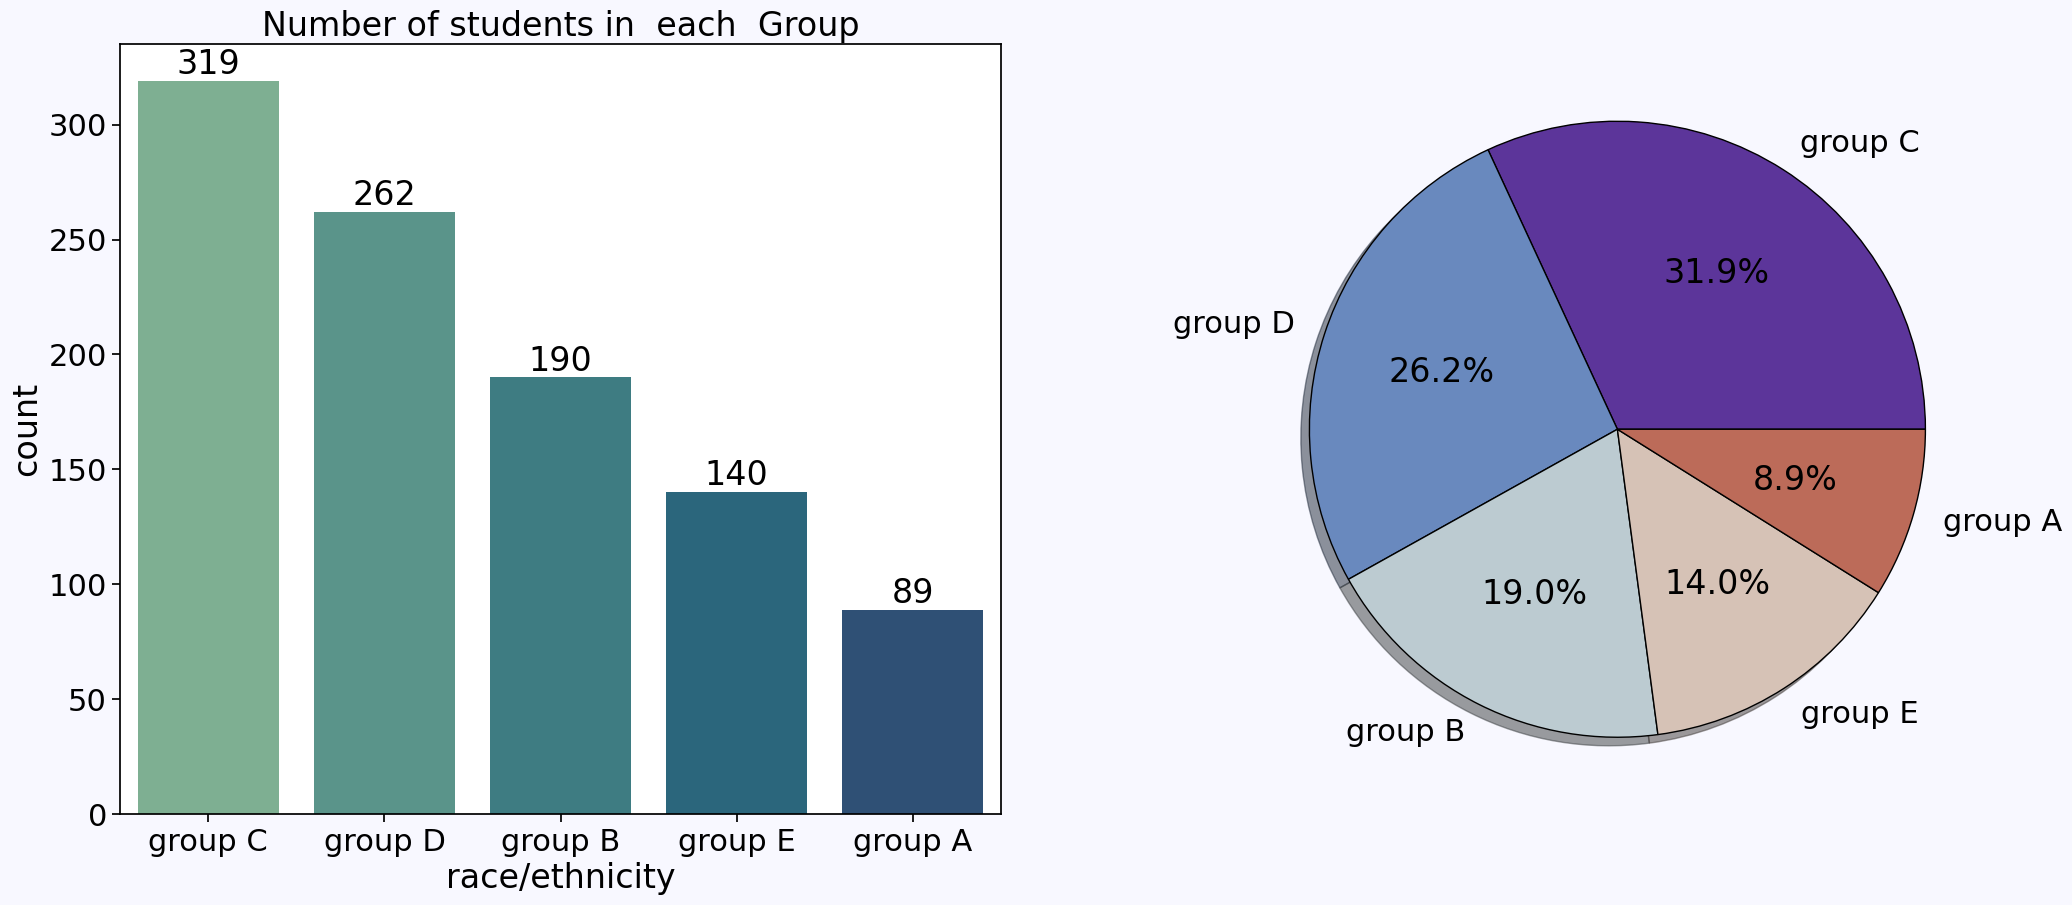

In [55]:
sns.set_context('notebook',font_scale= 2)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'race/ethnicity',data = df ,order = df['race/ethnicity'].value_counts().index ,palette="crest", ax = axs[0])
axs[0].set_title('Number of students in  each  Group')
g.bar_label(g.containers[0])
plt.pie(df['race/ethnicity'].value_counts().values , labels =df['race/ethnicity'].value_counts().index 
        , shadow = True , autopct= '%1.1f%%', wedgeprops= {'edgecolor' : 'black'} )
plt.grid()
plt.show()

 ### Conclusion : group c has the highiest number of students

# Number of  Male/Female in school and Percentage

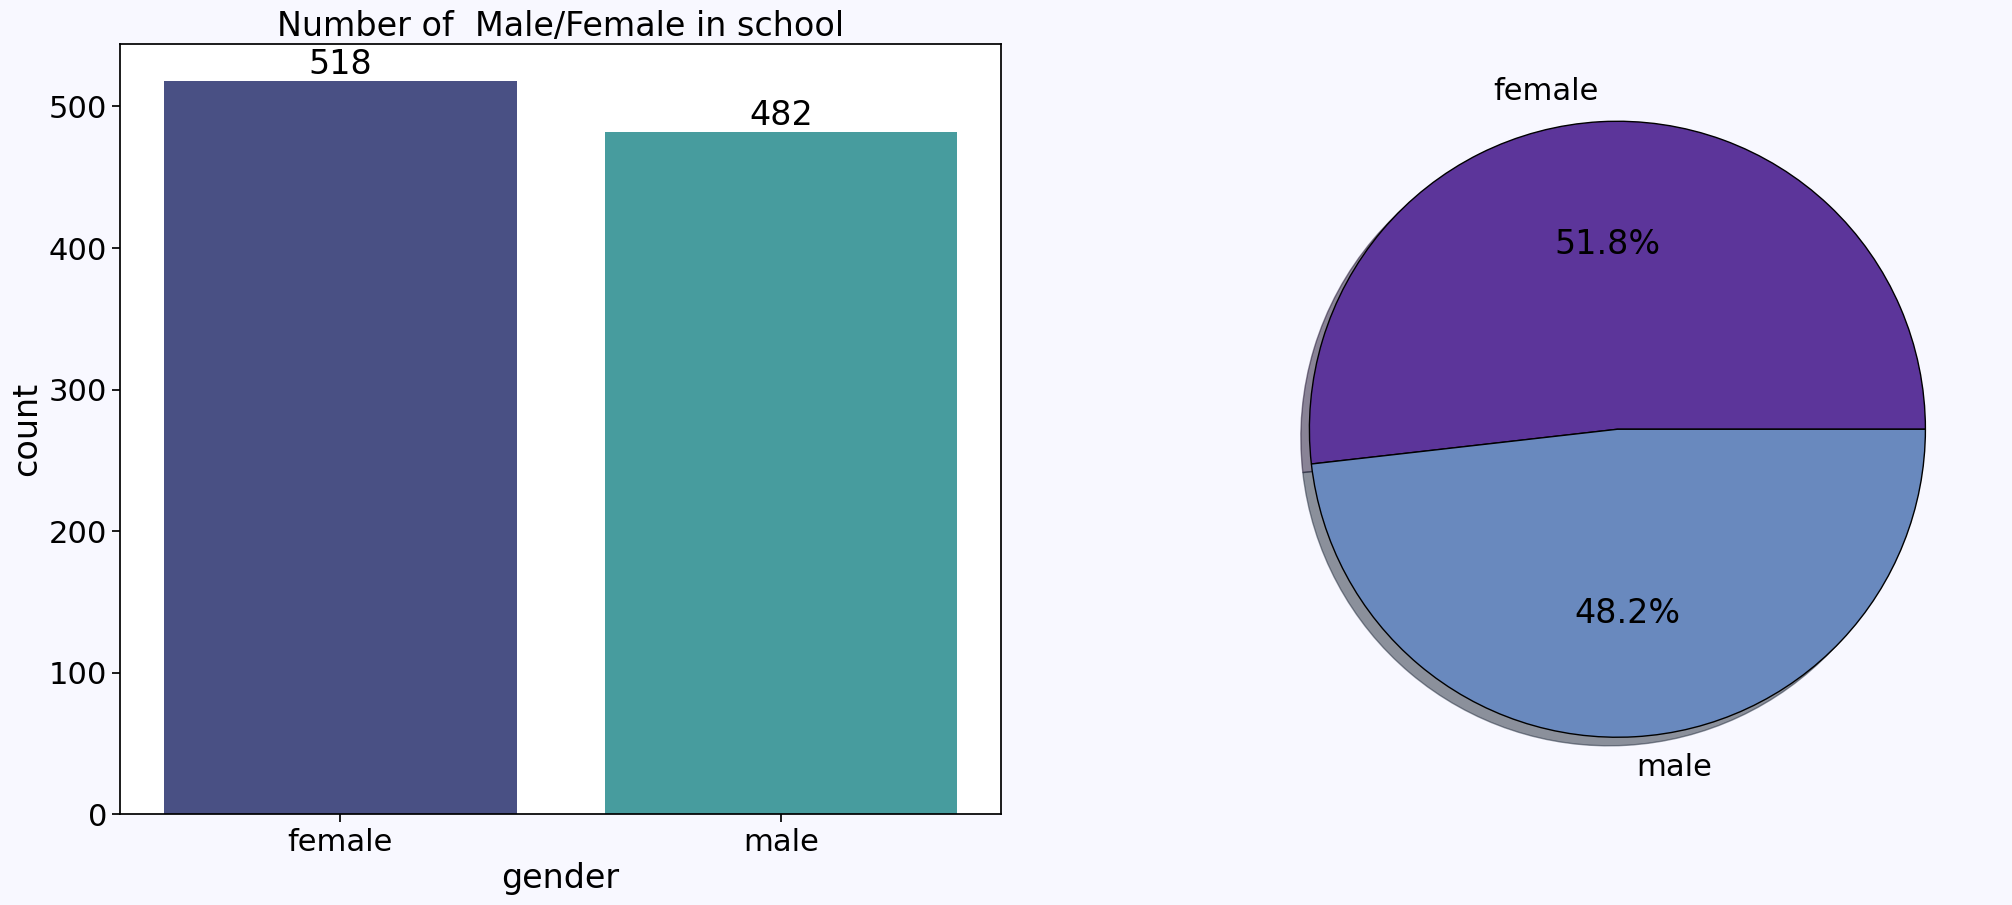

In [56]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'gender',data = df ,order = df['gender'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Number of  Male/Female in school')
g.bar_label(g.containers[0])
plt.pie(df['gender'].value_counts().values , labels =df['gender'].value_counts().index 
        , shadow = True , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

# Count of parental level of education and Percentage

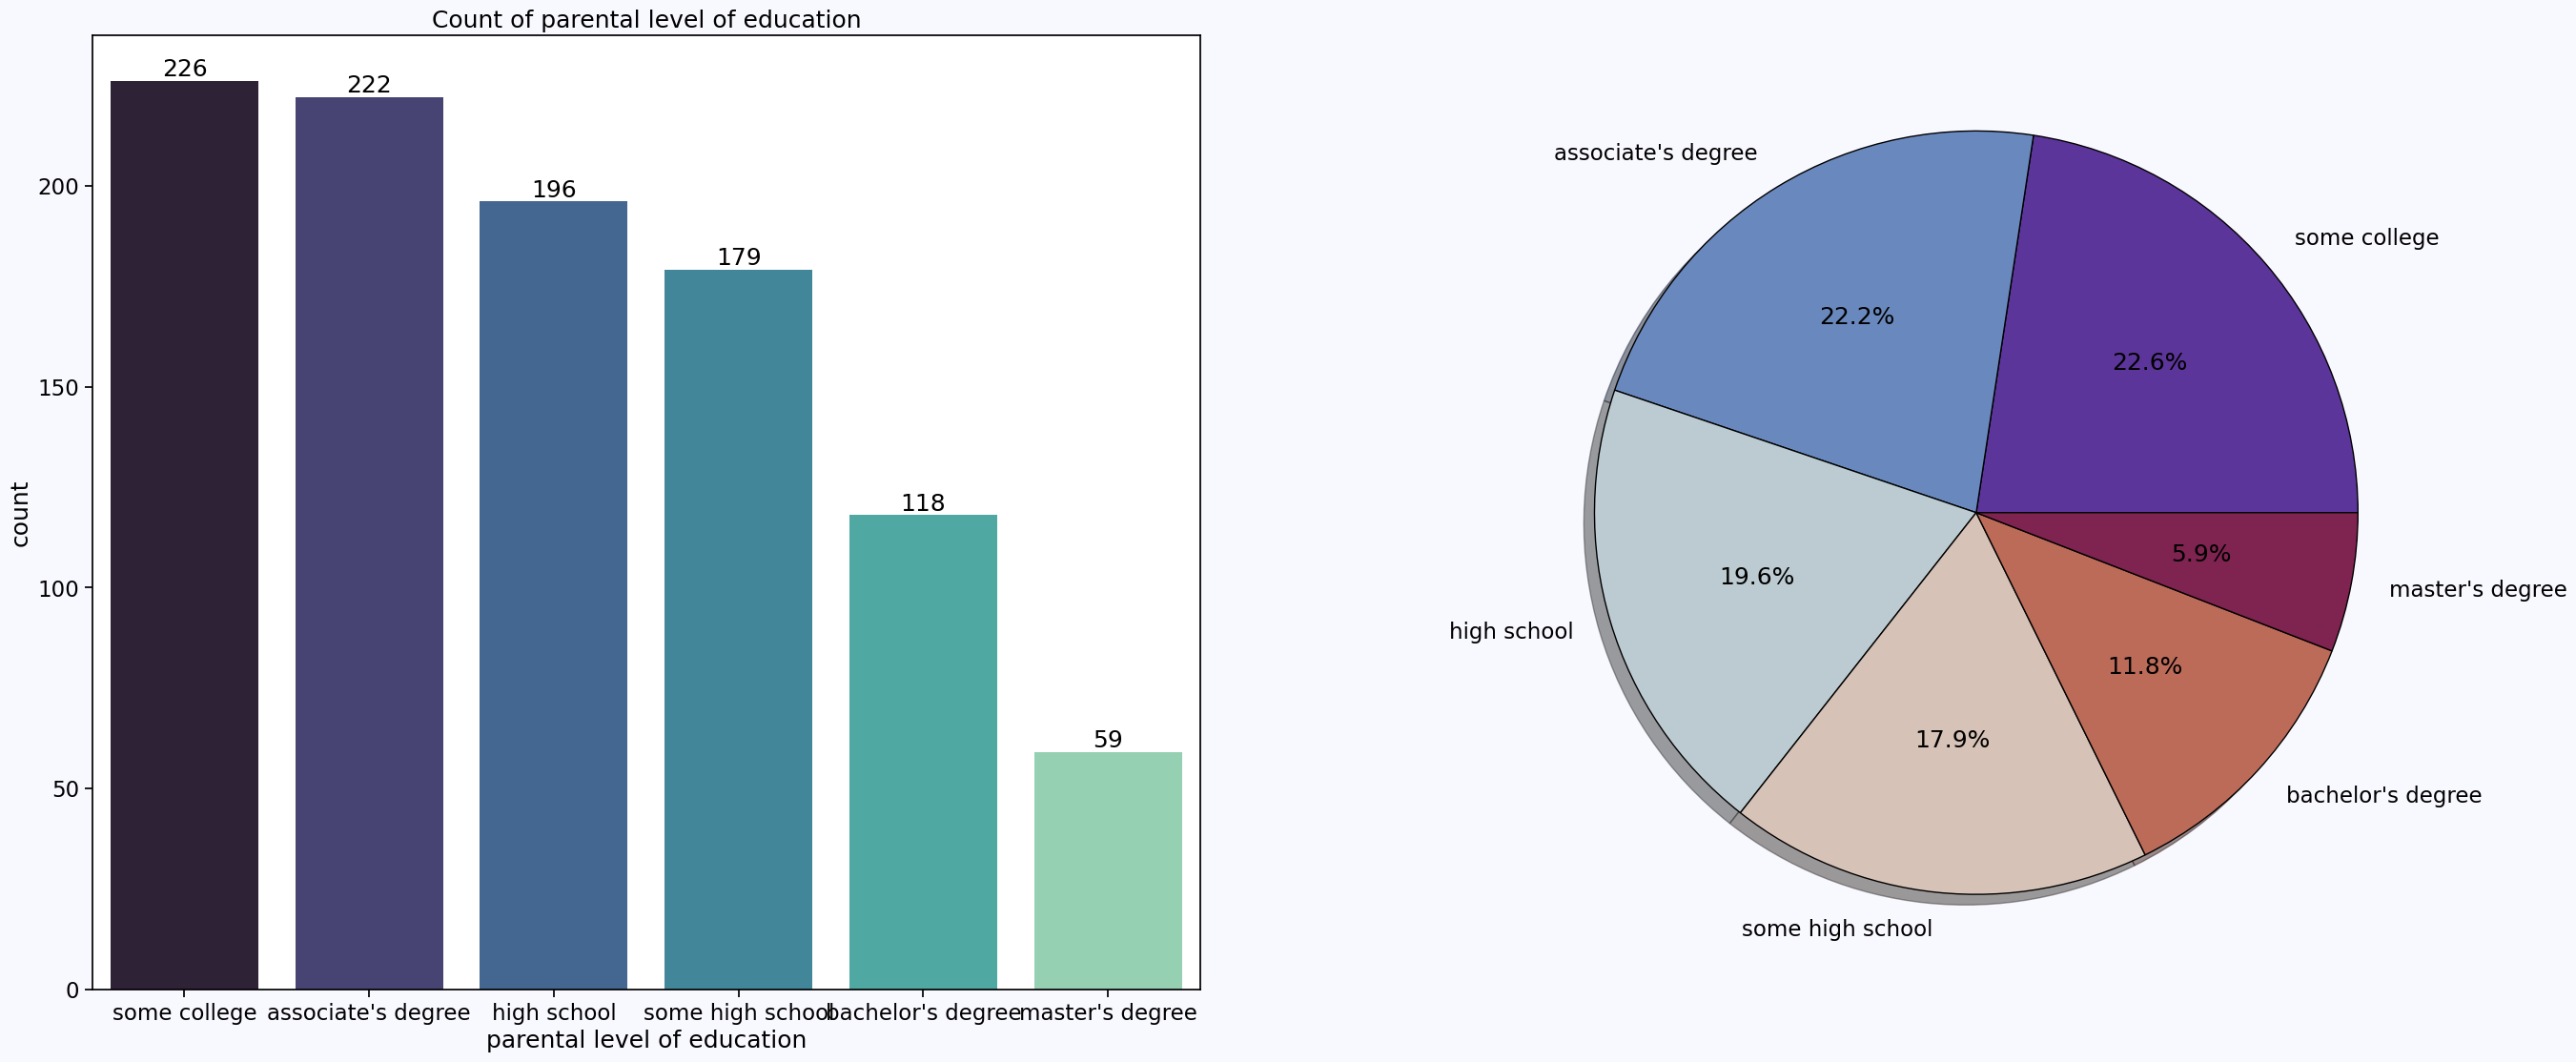

In [57]:
sns.set_context('notebook',font_scale= 1.5)
fig, axs = plt.subplots(1,2,figsize = (33,13))

g = sns.countplot(x = 'parental level of education',data = df ,order = df['parental level of education'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Count of parental level of education')
g.bar_label(g.containers[0])
plt.pie(df['parental level of education'].value_counts().values , labels =df['parental level of education'].value_counts().index 
        , shadow = True , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

# Number of Students who take Standard / (free/reduced)

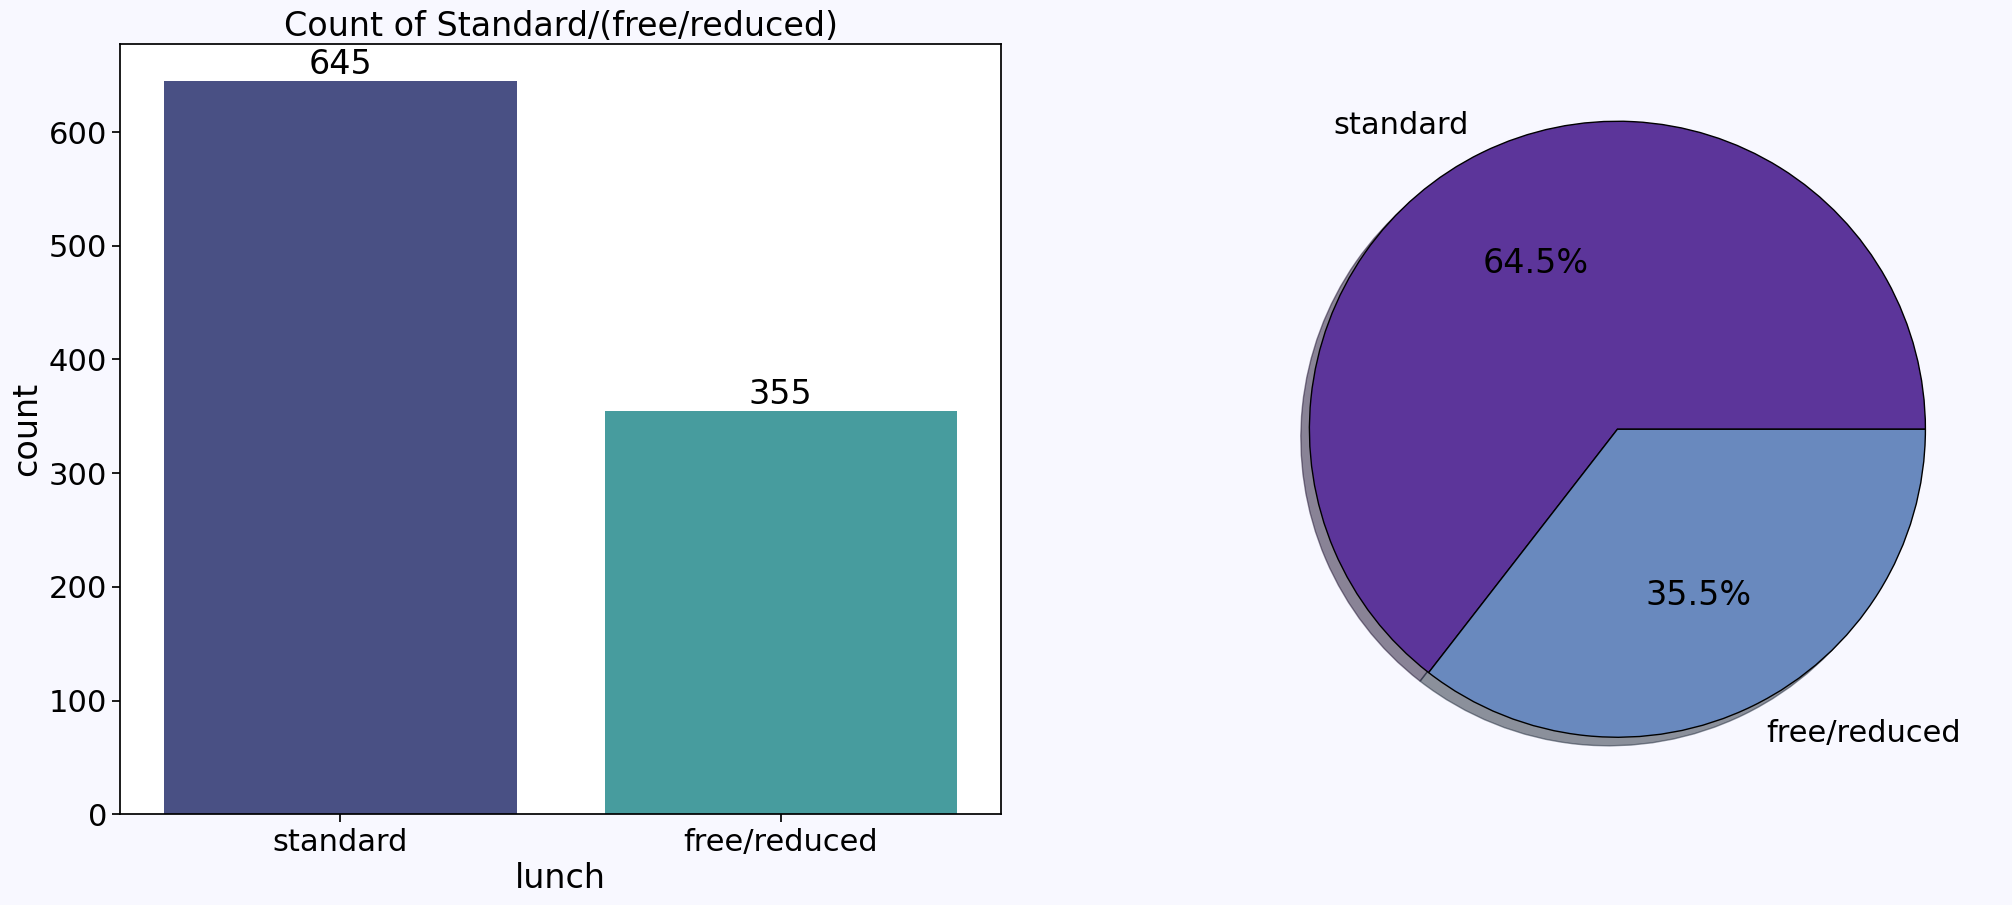

In [58]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'lunch',data = df ,order = df['lunch'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Count of Standard/(free/reduced)')
g.bar_label(g.containers[0])
plt.pie(df['lunch'].value_counts().values , labels =df['lunch'].value_counts().index 
        , shadow = True , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

# Number of of Studnts who take Preparation  Course

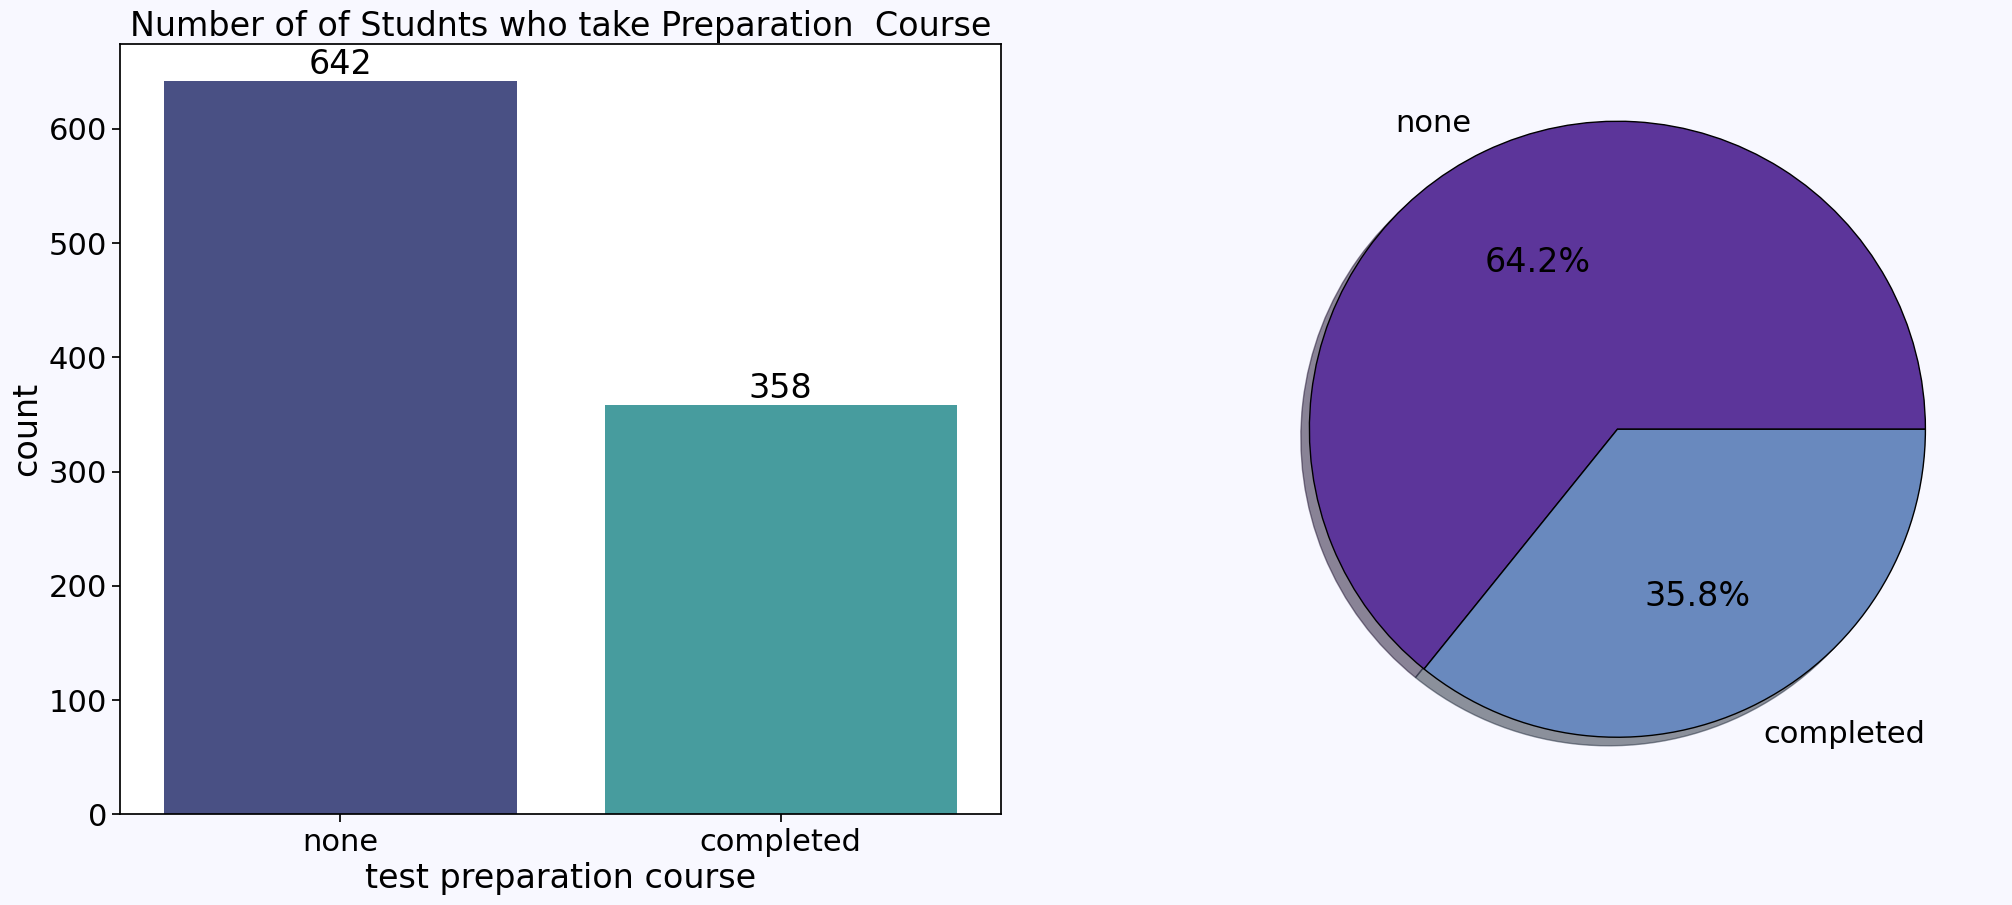

In [59]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(1,2,figsize = (25,10))

g = sns.countplot(x = 'test preparation course',data = df ,order = df['test preparation course'].value_counts().index ,palette="mako", ax = axs[0])
axs[0].set_title('Number of of Studnts who take Preparation  Course')
g.bar_label(g.containers[0])
plt.pie(df['test preparation course'].value_counts().values , labels =df['test preparation course'].value_counts().index 
        , shadow = True , autopct= '%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.show()

# Density Percentage by.....

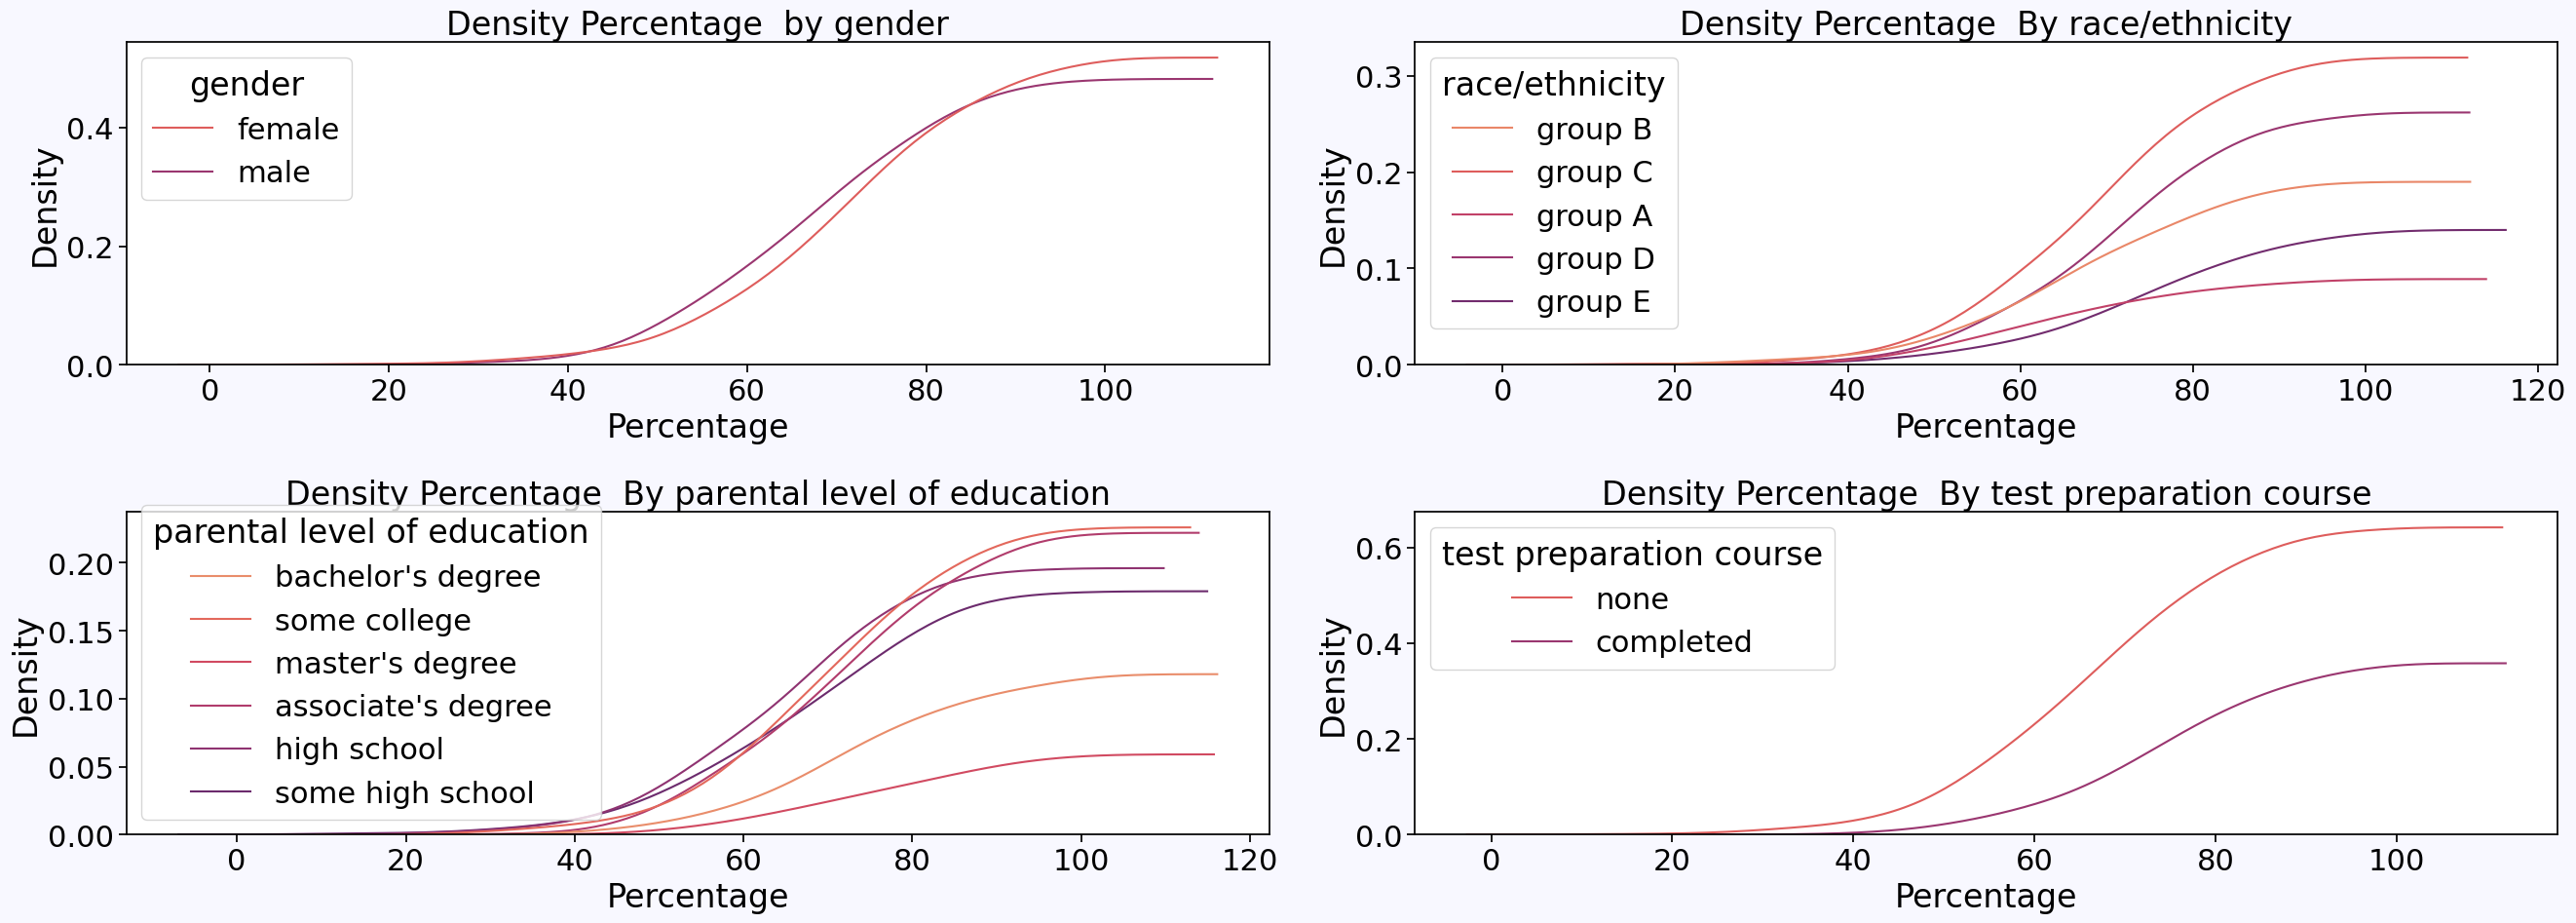

In [60]:
sns.set_context('notebook',font_scale= 2)
fig, axs = plt.subplots(2,2,figsize = (27,10))
sns.kdeplot(hue = 'gender',x = 'Percentage',data = df ,cumulative=True   , palette= 'flare' ,ax = axs[0][0])
axs[0][0].set_title('Density Percentage  by gender')

sns.kdeplot(hue= 'race/ethnicity',x = 'Percentage',data = df ,cumulative=True  , palette= 'flare' ,ax = axs[0][1])
axs[0][1].set_title('Density Percentage  By race/ethnicity')

sns.kdeplot(hue = 'parental level of education',x = 'Percentage',data = df  ,cumulative=True  , palette= 'flare' ,ax = axs[1][0])
axs[1][0].set_title('Density Percentage  By parental level of education')

sns.kdeplot(hue = 'test preparation course',x = 'Percentage',data = df ,cumulative=True   , palette= 'flare' ,ax = axs[1][1])
axs[1][1].set_title('Density Percentage  By test preparation course')
plt.tight_layout()
plt.show()

# how the students  perform in in exams by gender / (race/ethnicity) ?

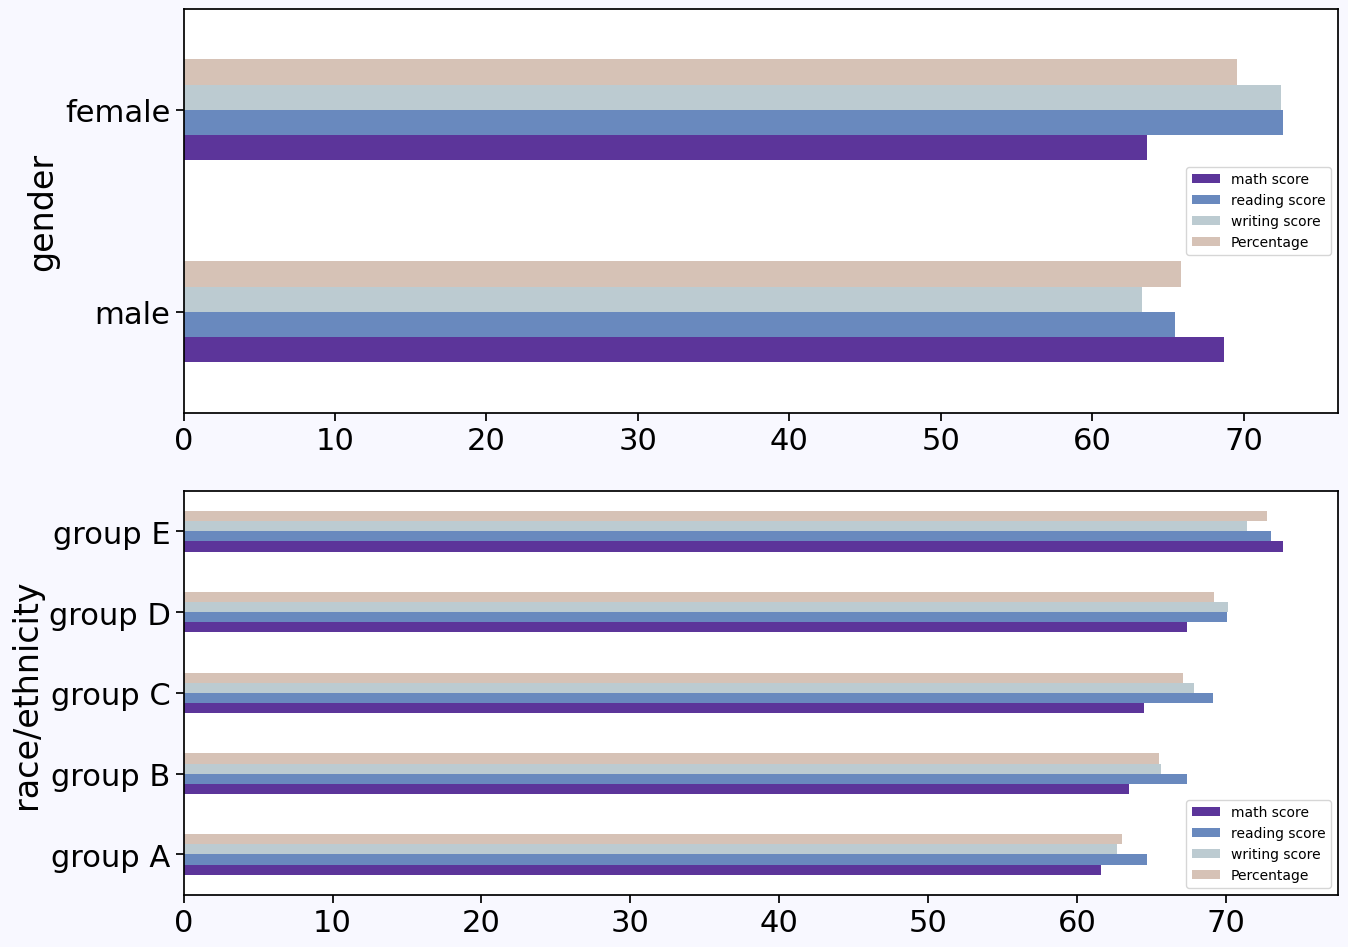

In [61]:
fig, axs = plt.subplots(2,1,figsize = (14,10))

sns.set_palette("twilight_shifted")
df.groupby('gender').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[0]).legend(prop={'size': 10},loc = "center right")
df.groupby('race/ethnicity').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[1]).legend(prop={'size': 10})
plt.tight_layout()
plt.show()

# how the students  perform  in exams by parental level of education / lunch ?

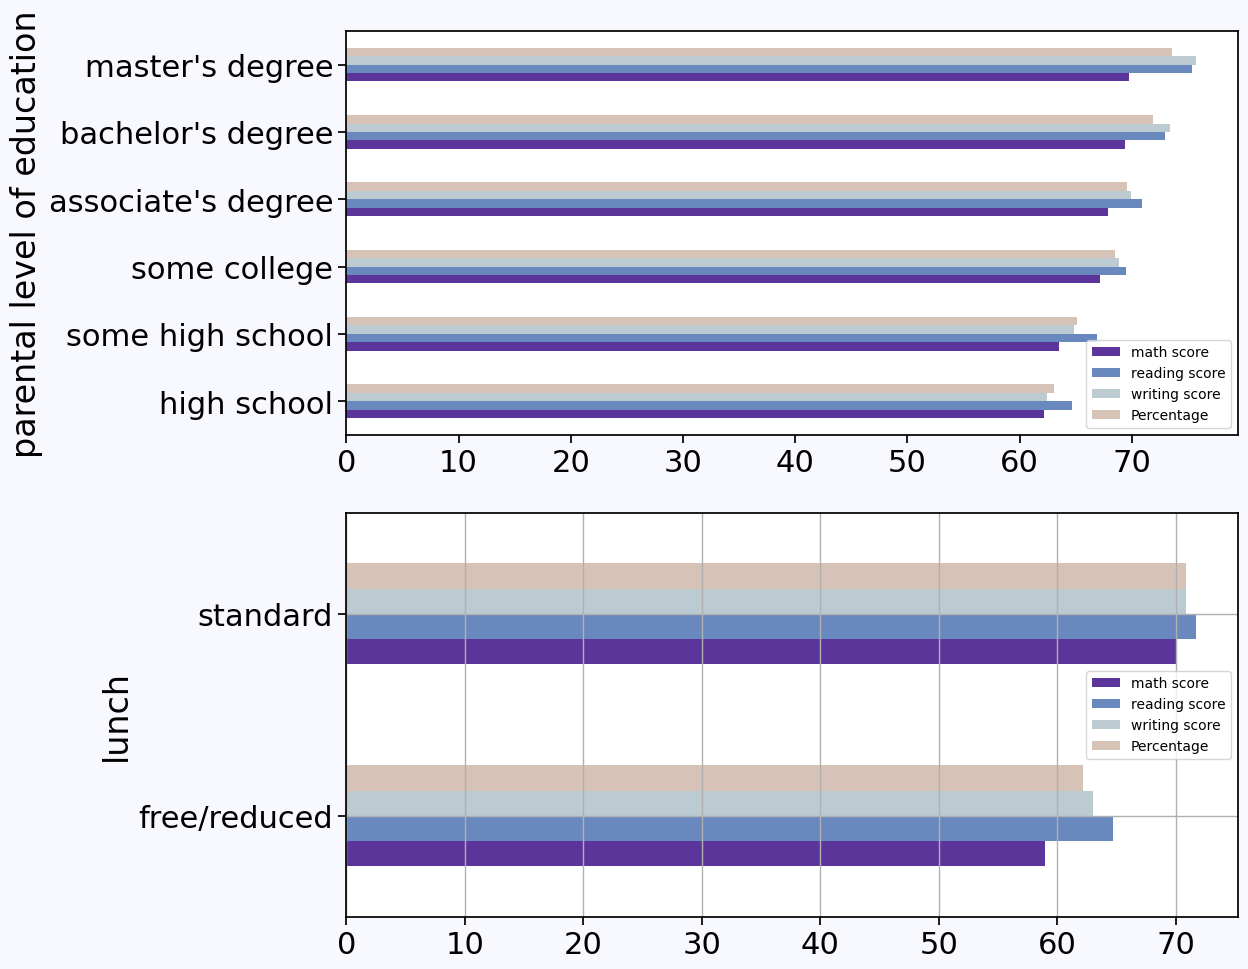

In [62]:
fig, axs = plt.subplots(2,1,figsize = (13,10))

sns.set_palette("twilight_shifted")
df.groupby('parental level of education').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[0]).legend(prop={'size': 10})
df.groupby('lunch').aggregate(np.mean).sort_values(by = 'Percentage').plot(kind= 'barh', ax = axs[1]).legend(prop={'size': 10},loc = 'center right')
plt.grid()
plt.tight_layout()
plt.show()

# how the students  perform in each  exams by gender ?

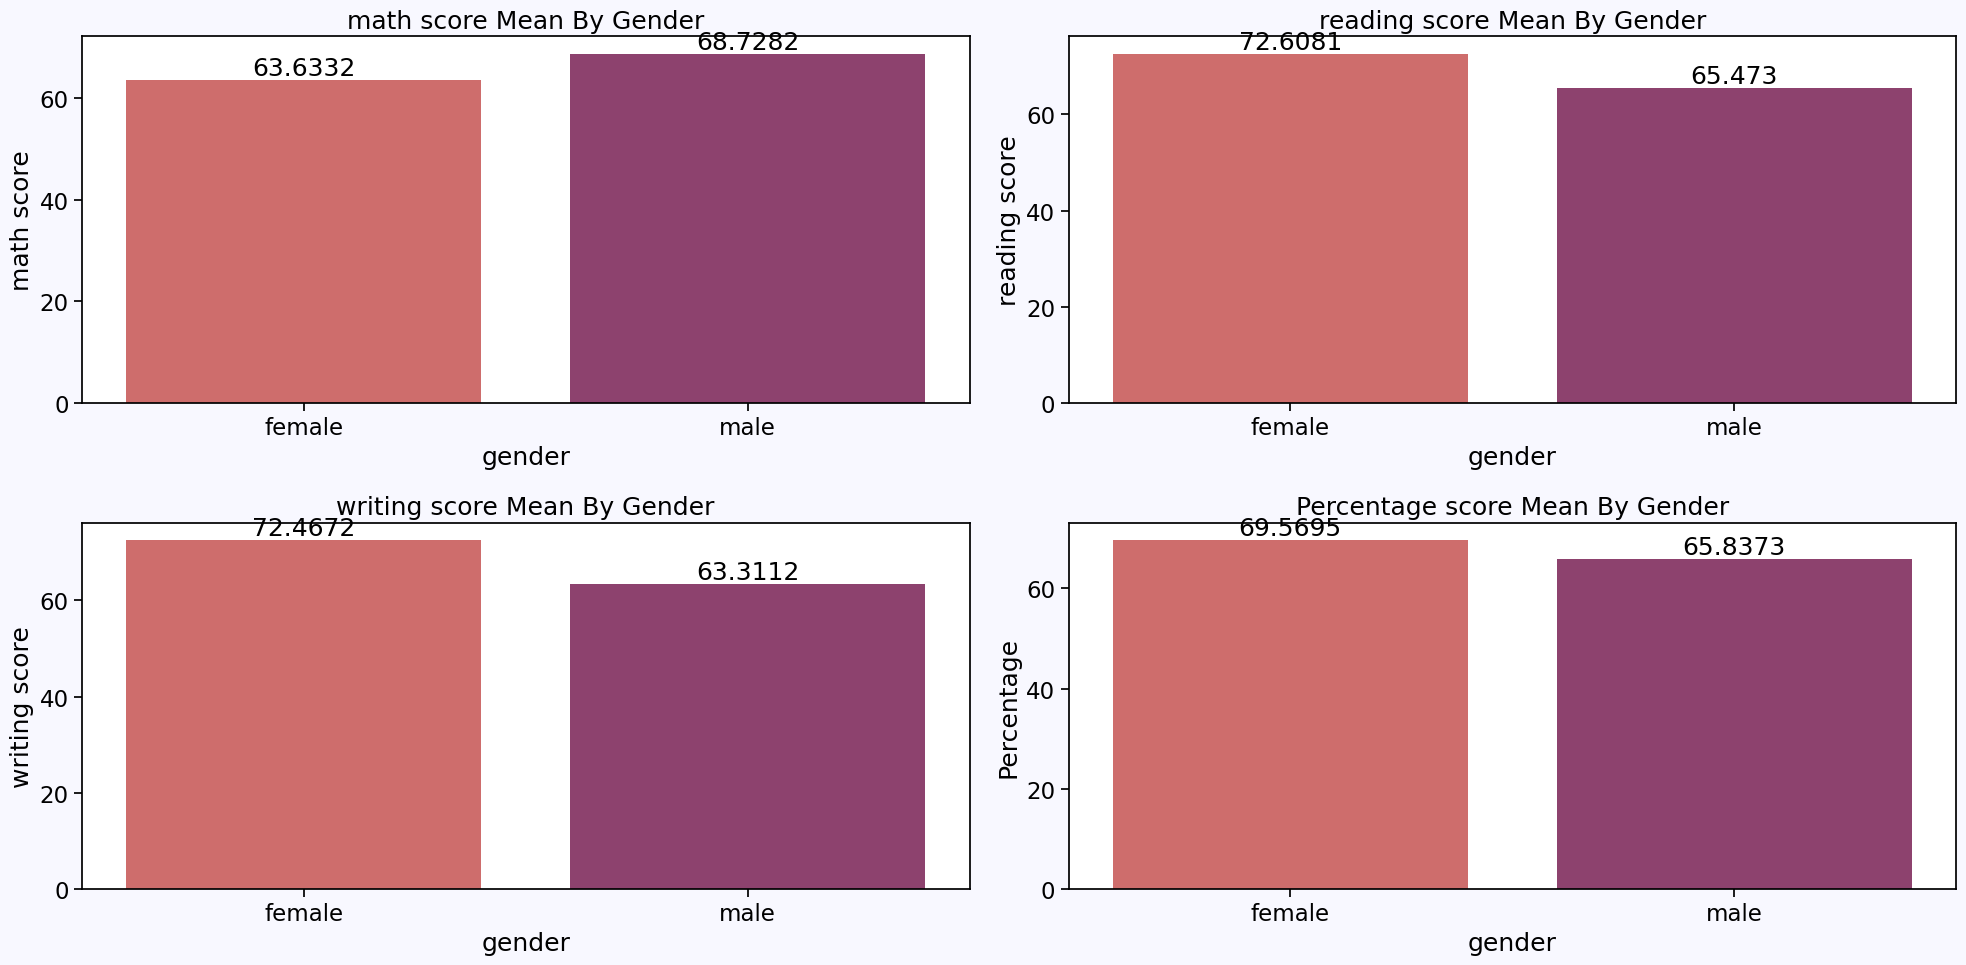

In [63]:
sns.set_context('notebook',font_scale= 1.5)
fig, axs = plt.subplots(2,2,figsize = (20,10))

g = sns.barplot(x = 'gender',y = 'math score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][0])
g.bar_label(g.containers[0])
axs[0][0].set_title('math score Mean By Gender')

g = sns.barplot(x = 'gender',y = 'reading score',data = df  ,ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][1])
g.bar_label(g.containers[0])
axs[0][1].set_title('reading score Mean By Gender')

g = sns.barplot(x = 'gender',y = 'writing score',data = df  ,ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][0])
g.bar_label(g.containers[0])
axs[1][0].set_title('writing score Mean By Gender')

g = sns.barplot(x = 'gender',y = 'Percentage',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][1])
g.bar_label(g.containers[0])
axs[1][1].set_title('Percentage score Mean By Gender')
plt.tight_layout()
plt.show()

#  Score distribution in exams by gender

<AxesSubplot:xlabel='Percentage', ylabel='Count'>

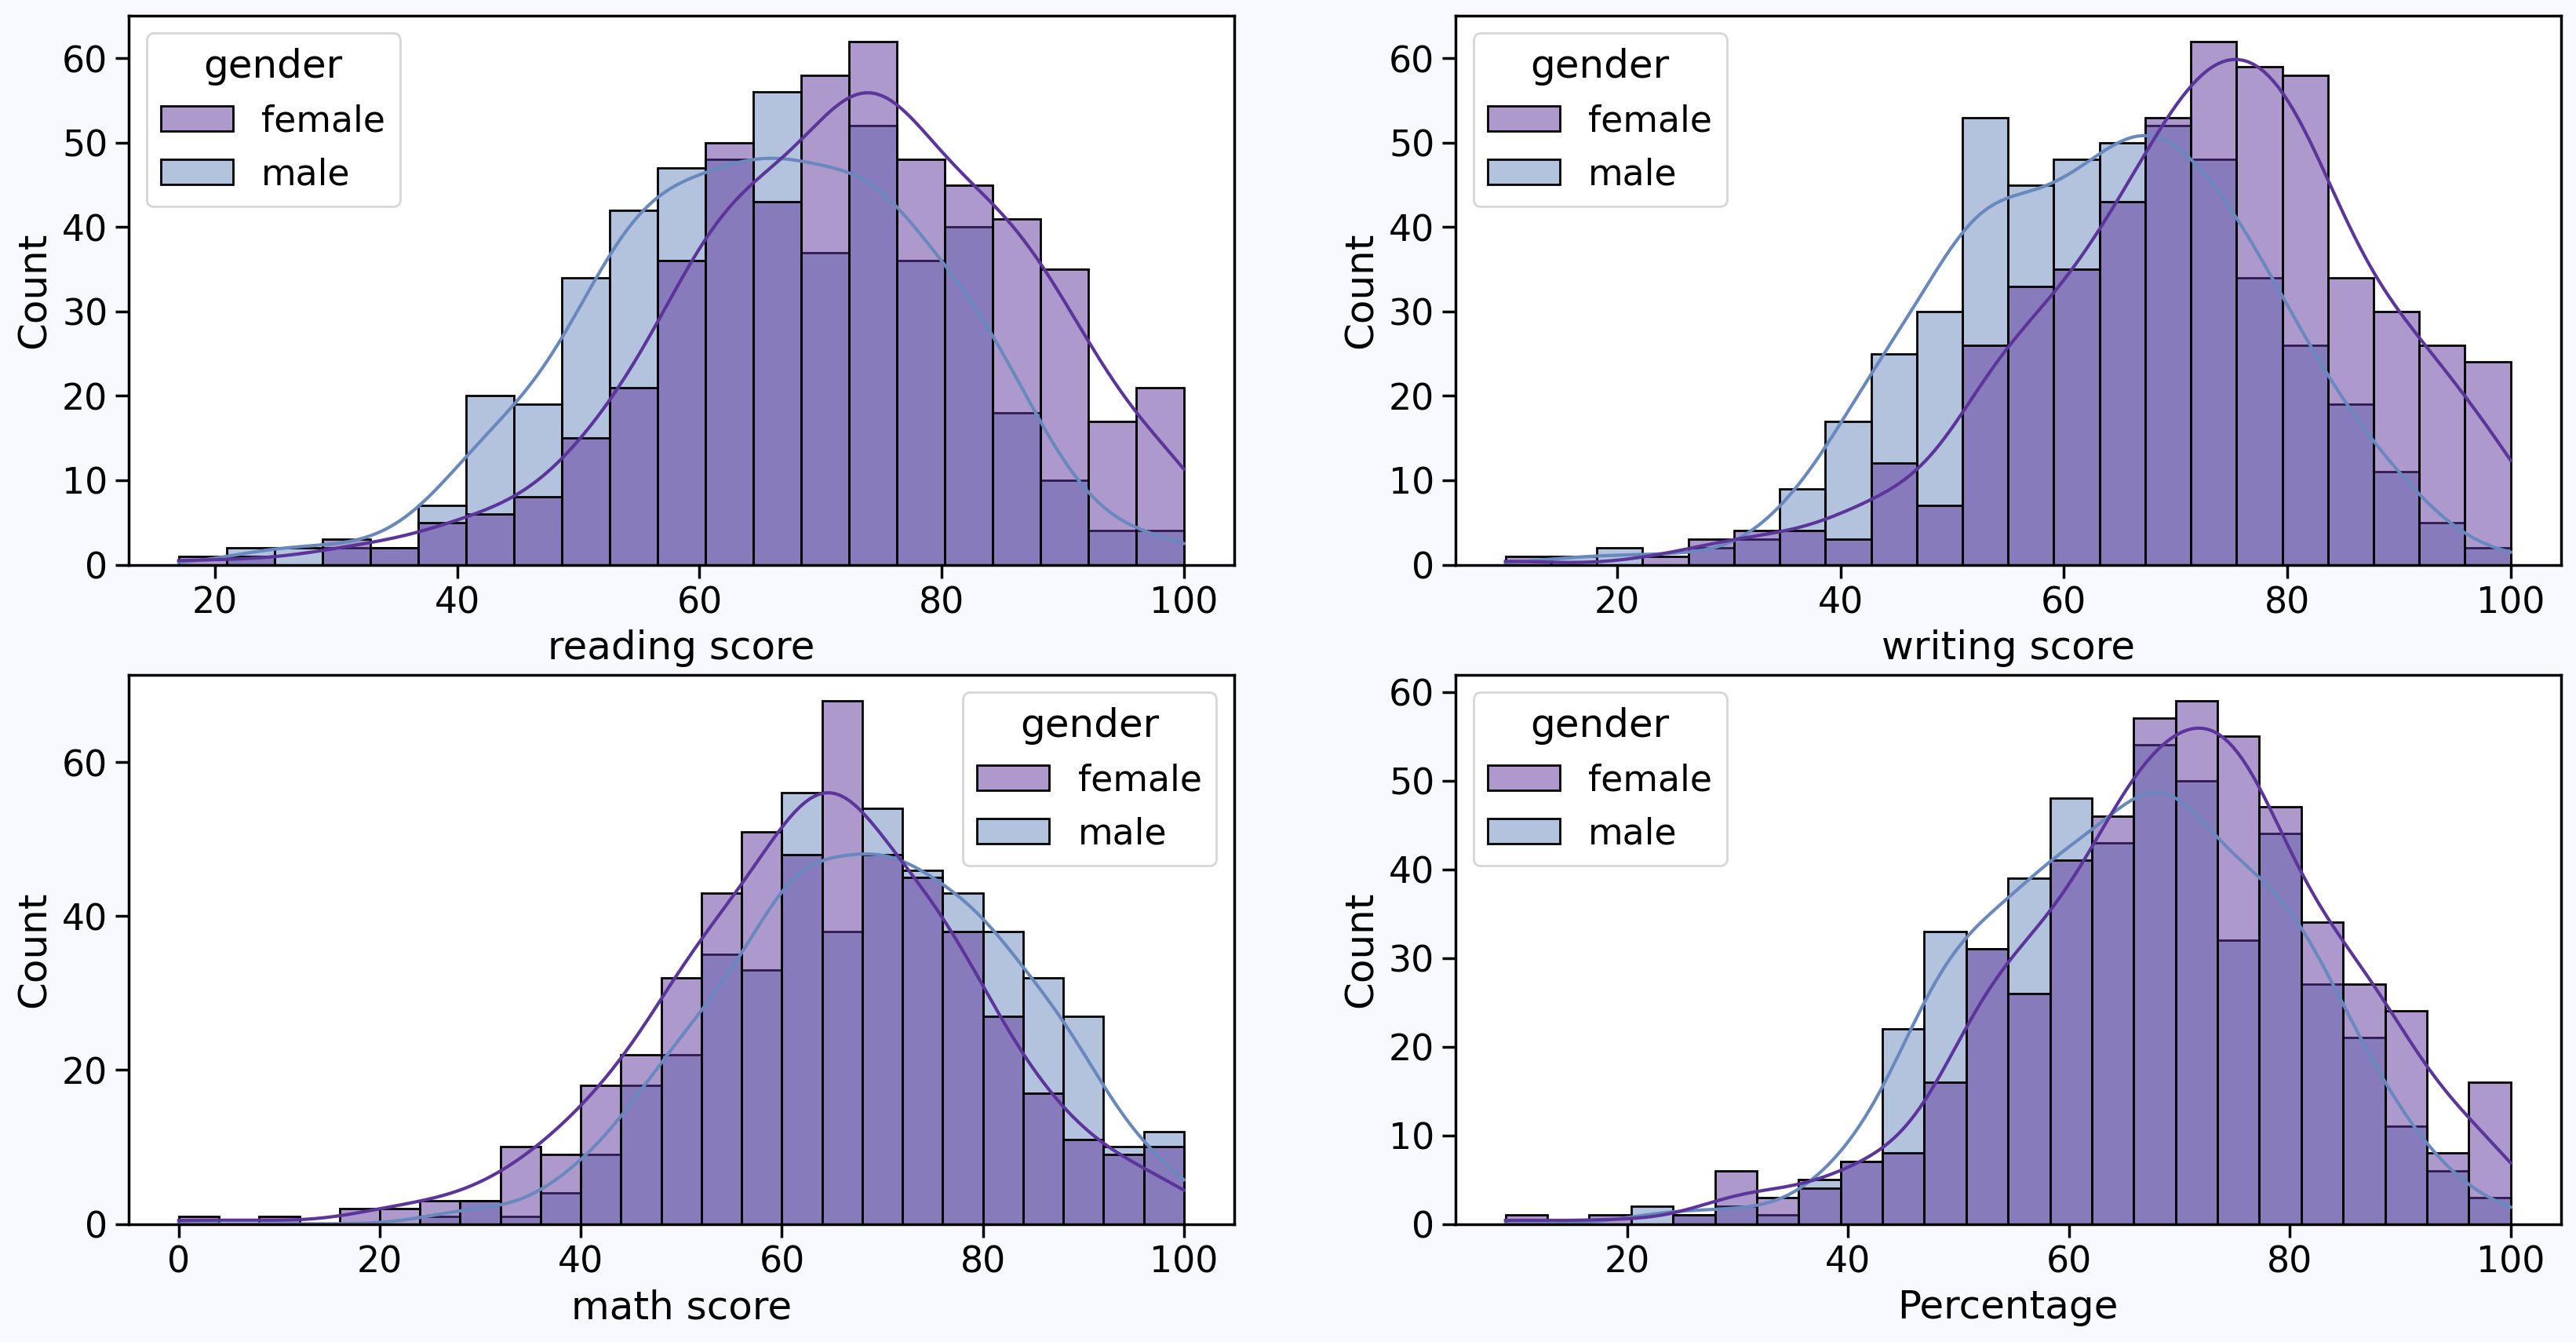

In [64]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10),dpi = 200)#dpi = 120
sns.histplot(x = 'reading score' ,data =df ,ax = axs[0][0] ,hue ='gender' ,kde = True)
sns.histplot(x = 'writing score' ,data =df ,ax = axs[0][1],hue ='gender',kde = True)
sns.histplot(x = 'math score' ,data =df ,ax = axs[1][0],hue ='gender',kde = True)
sns.histplot(x = 'Percentage' ,data =df ,ax = axs[1][1],hue ='gender',kde = True)

# Pairplot 

Text(0.5, 1.08, 'Pair plot for Gender')

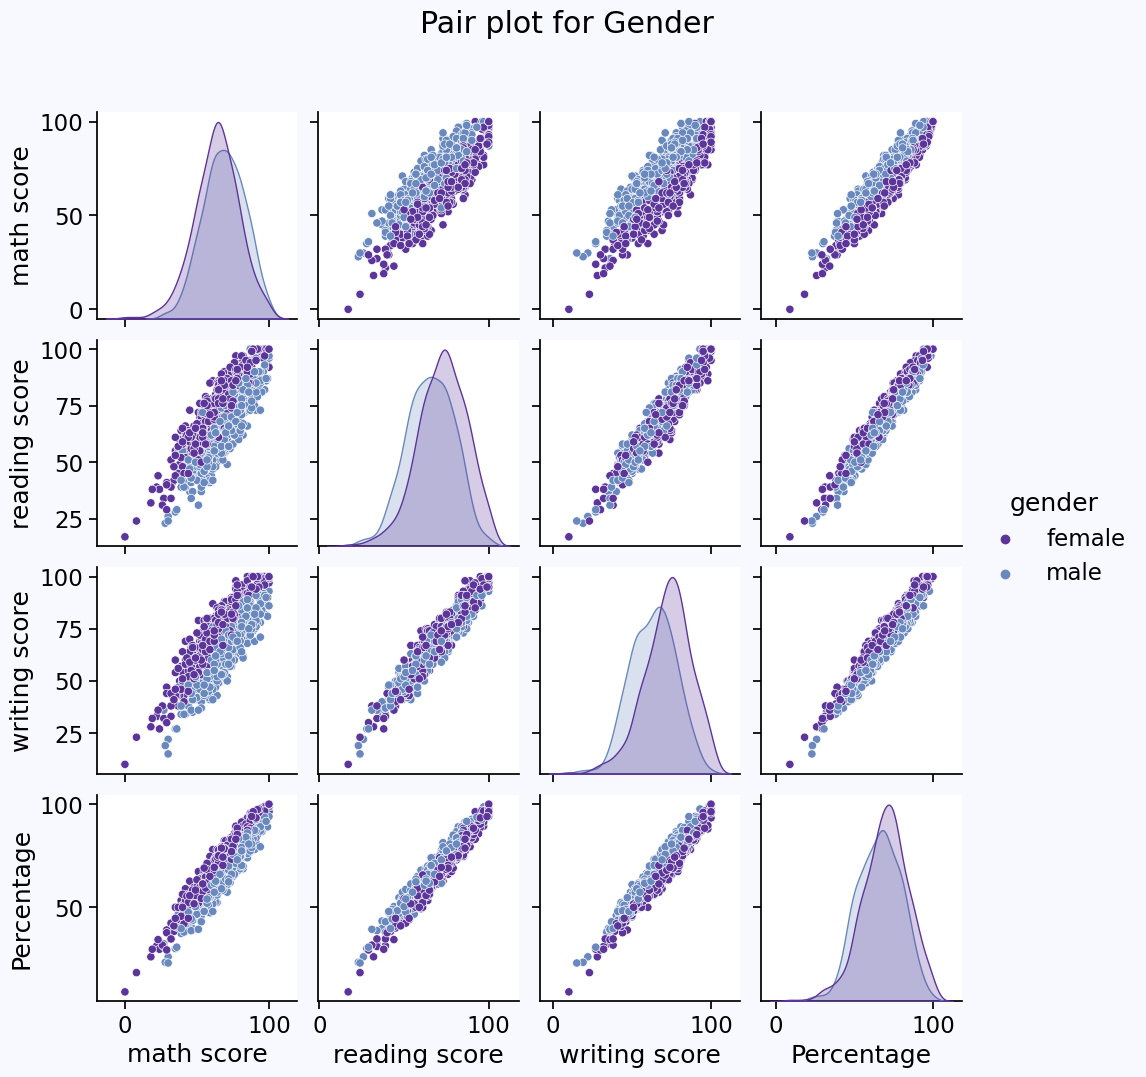

In [65]:
g  = sns.pairplot(data = df, hue="gender")
g.fig.suptitle("Pair plot for Gender", y=1.08)

# violinplot  for exams by gender

<AxesSubplot:xlabel='gender', ylabel='reading score'>

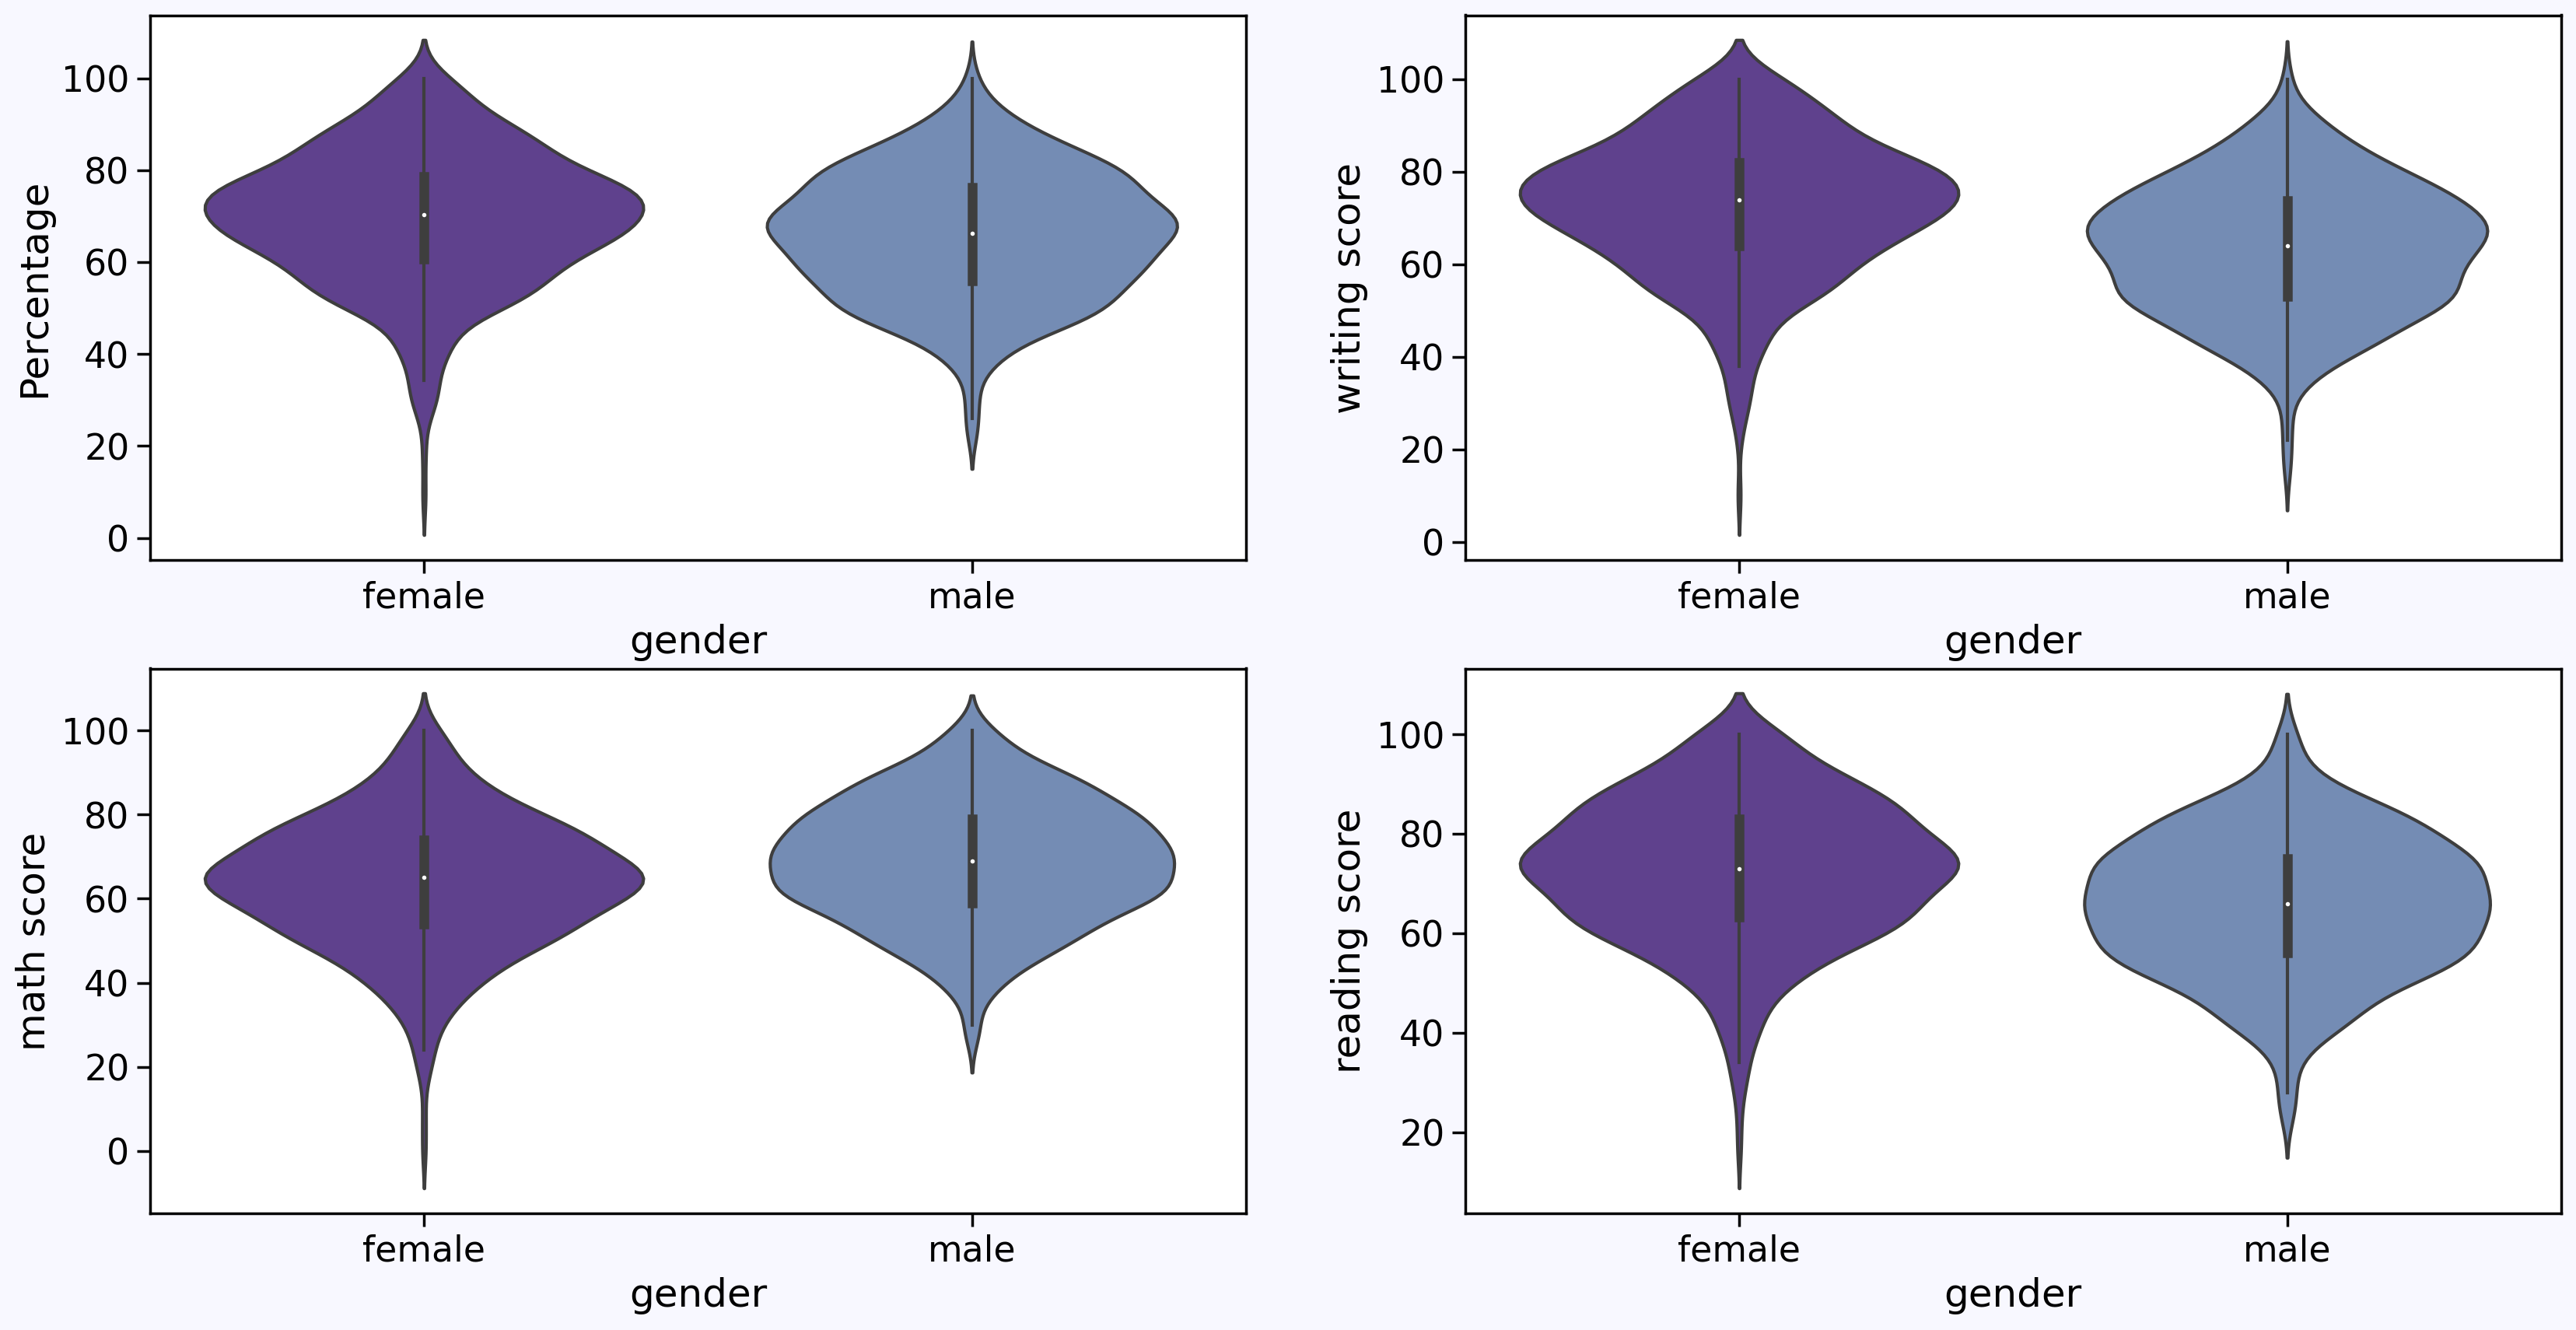

In [66]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10),dpi = 200)#dpi = 120
sns.violinplot(data = df , y = 'Percentage',x = 'gender' , ax = axs[0][0])
sns.violinplot(data = df , y = 'writing score',x = 'gender' , ax = axs[0][1])
sns.violinplot(data = df , y = 'math score',x = 'gender' , ax = axs[1][0])
sns.violinplot(data = df , y = 'reading score',x = 'gender' , ax = axs[1][1])

# how the students  perform in each  exams by parental level of education ?

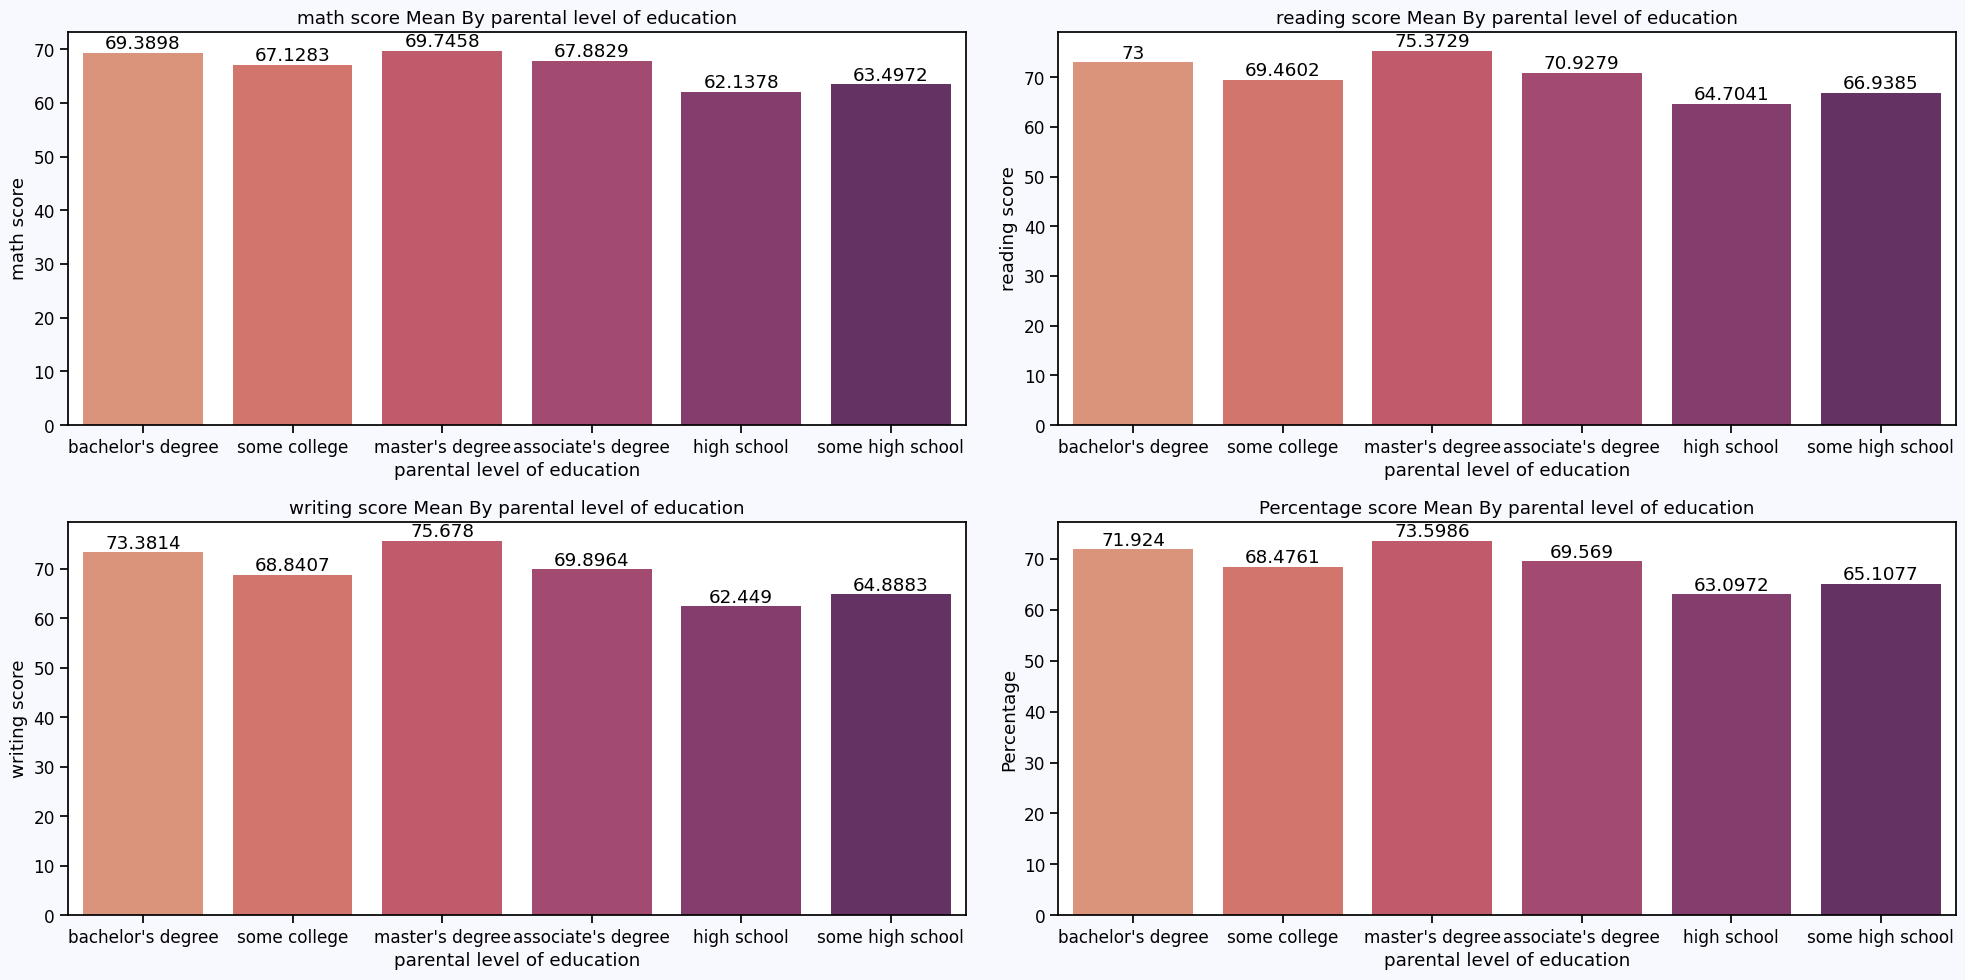

In [67]:
sns.set_context('notebook',font_scale= 1.1)
fig, axs = plt.subplots(2,2,figsize = (20,10))

g = sns.barplot(x = 'parental level of education',y = 'math score',data = df  ,ci=None,estimator=np.mean , palette= 'flare' ,ax = axs[0][0])
g.bar_label(g.containers[0])
axs[0][0].set_title('math score Mean By parental level of education')

g = sns.barplot(x = 'parental level of education',y = 'reading score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][1])
g.bar_label(g.containers[0])
axs[0][1].set_title('reading score Mean By parental level of education')

g = sns.barplot(x = 'parental level of education',y = 'writing score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][0])
g.bar_label(g.containers[0])
axs[1][0].set_title('writing score Mean By parental level of education')

g = sns.barplot(x = 'parental level of education',y = 'Percentage',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][1])
g.bar_label(g.containers[0])
axs[1][1].set_title('Percentage score Mean By parental level of education')

plt.tight_layout()
plt.show()

# Heatmap for exams by parental level of education

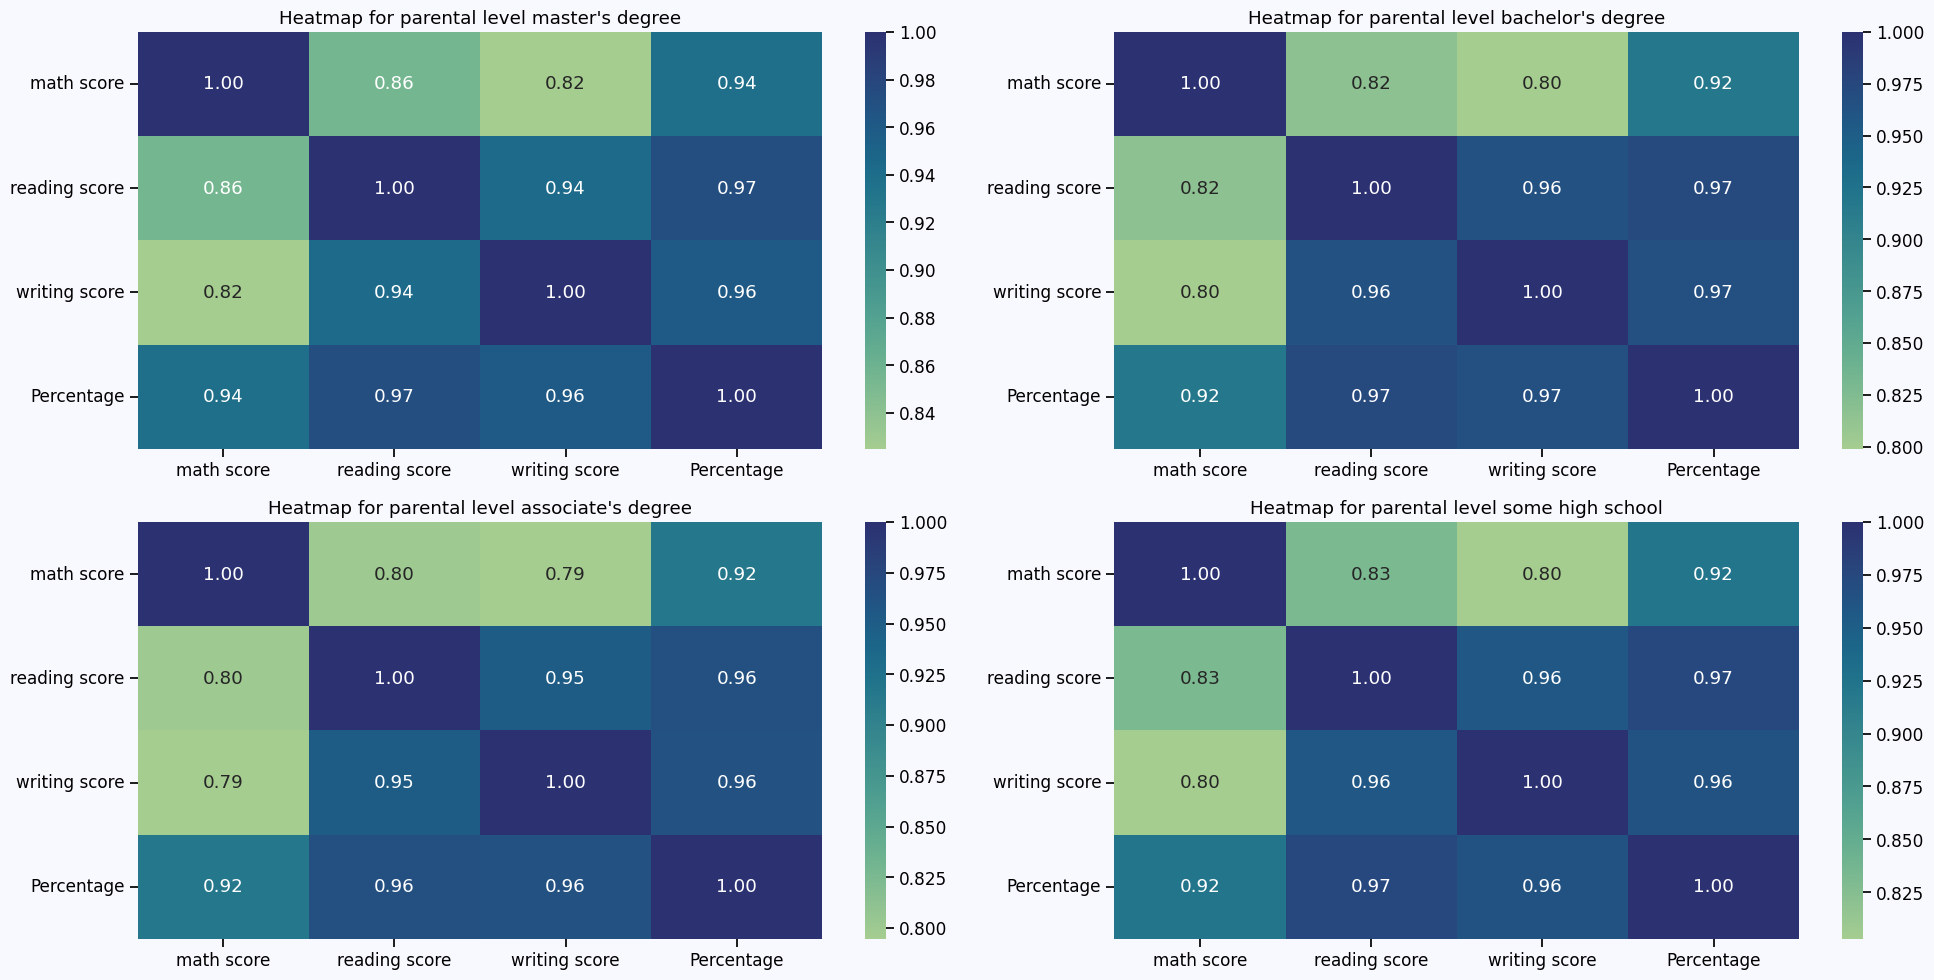

In [68]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))#dpi = 120

sns.heatmap(df.loc[df['parental level of education'] == "master's degree",:].corr(), cmap = "crest" ,fmt = '.2f' ,annot=True ,ax = axs[0][0])
axs[0][0].set_title("Heatmap for parental level master's degree")

sns.heatmap(df.loc[df['parental level of education'] == "bachelor's degree",:].corr(), cmap = "crest" ,fmt = '.2f' ,annot=True ,ax = axs[0][1])
axs[0][1].set_title("Heatmap for parental level bachelor's degree")

sns.heatmap(df.loc[df['parental level of education'] == "associate's degree",:].corr(), cmap = "crest" ,fmt = '.2f' ,annot=True ,ax = axs[1][0])
axs[1][0].set_title("Heatmap for parental level associate's degree")

sns.heatmap(df.loc[df['parental level of education'] == "some high school",:].corr(), cmap = "crest" ,fmt = '.2f' ,annot=True ,ax = axs[1][1])
axs[1][1].set_title("Heatmap for parental level some high school")

plt.tight_layout()
plt.show()

# how the students  perform in each  exams by race/ethnicity ?

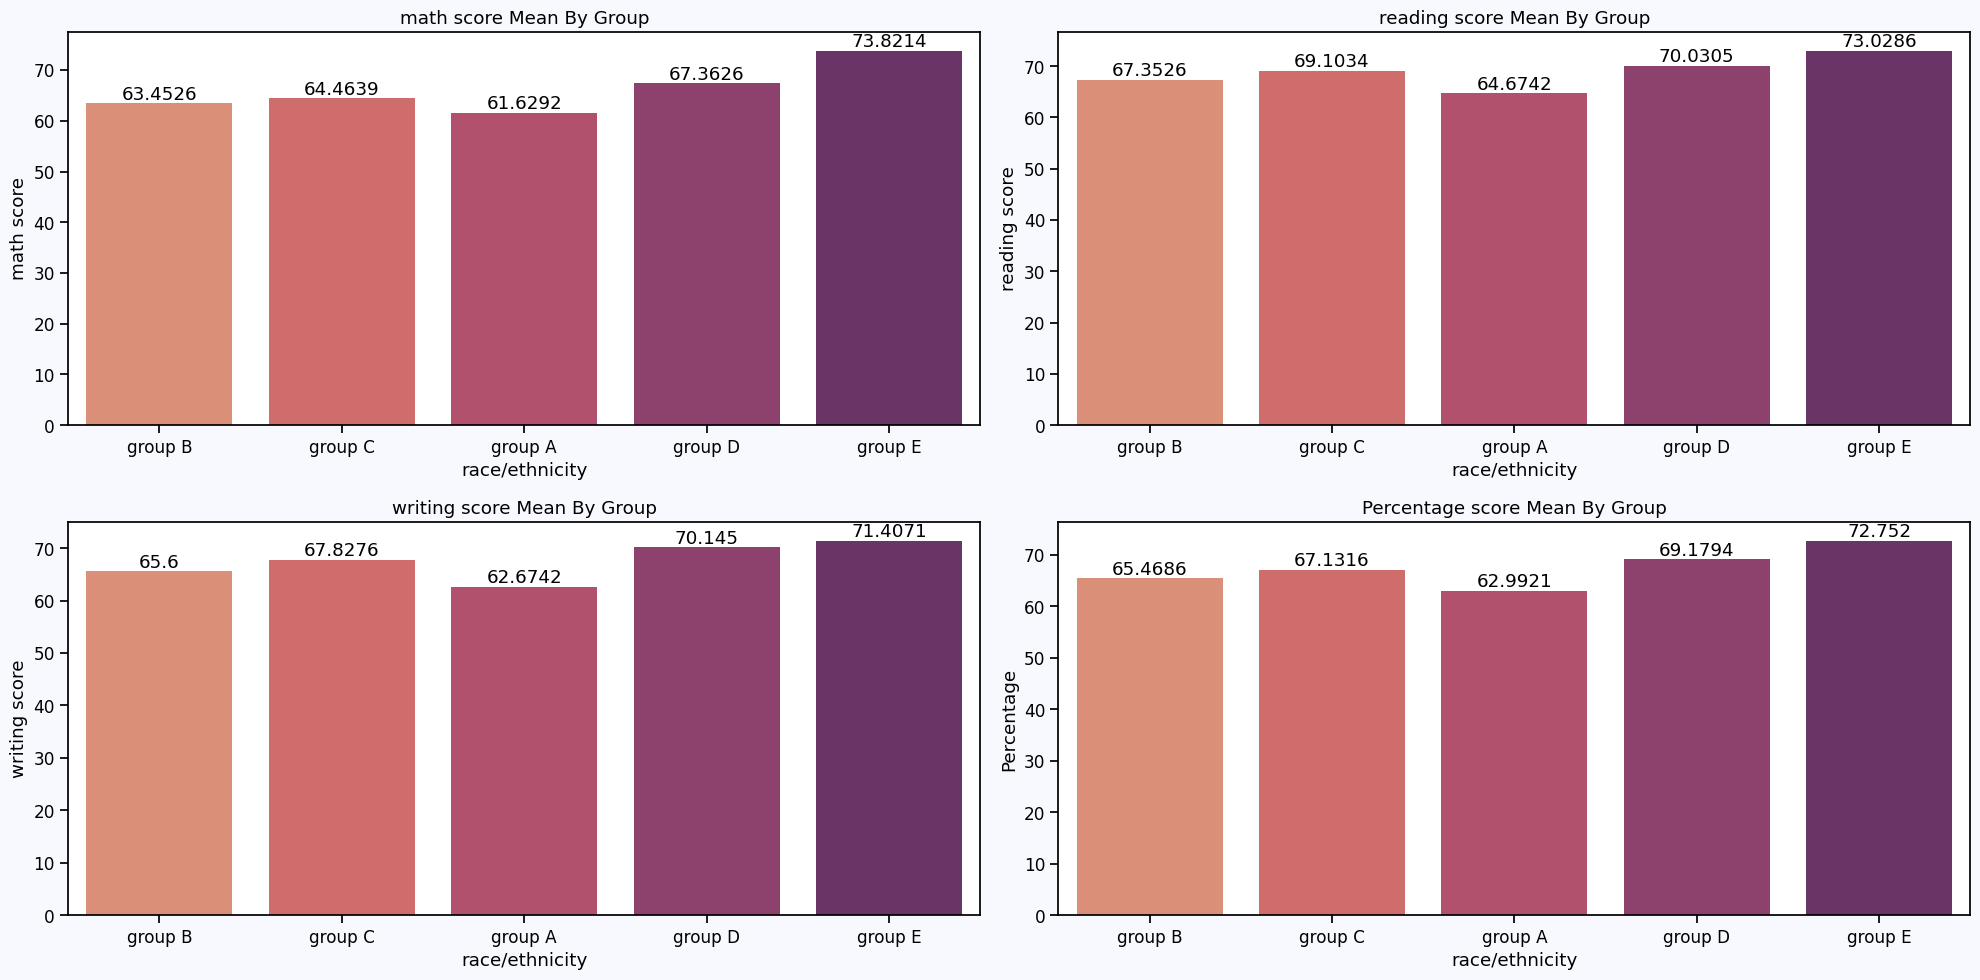

In [69]:
fig, axs = plt.subplots(2,2,figsize = (20,10))

g = sns.barplot(x = 'race/ethnicity',y = 'math score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][0])
g.bar_label(g.containers[0])
axs[0][0].set_title('math score Mean By Group')

g = sns.barplot(x = 'race/ethnicity',y = 'reading score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][1])
g.bar_label(g.containers[0])
axs[0][1].set_title('reading score Mean By Group')

g = sns.barplot(x = 'race/ethnicity',y = 'writing score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][0])
g.bar_label(g.containers[0])
axs[1][0].set_title('writing score Mean By Group')

g = sns.barplot(x = 'race/ethnicity',y = 'Percentage',data = df , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][1])
g.bar_label(g.containers[0])
axs[1][1].set_title('Percentage score Mean By Group')

plt.tight_layout()
plt.show()

# did the student who toke preparation course did better in the exams ?

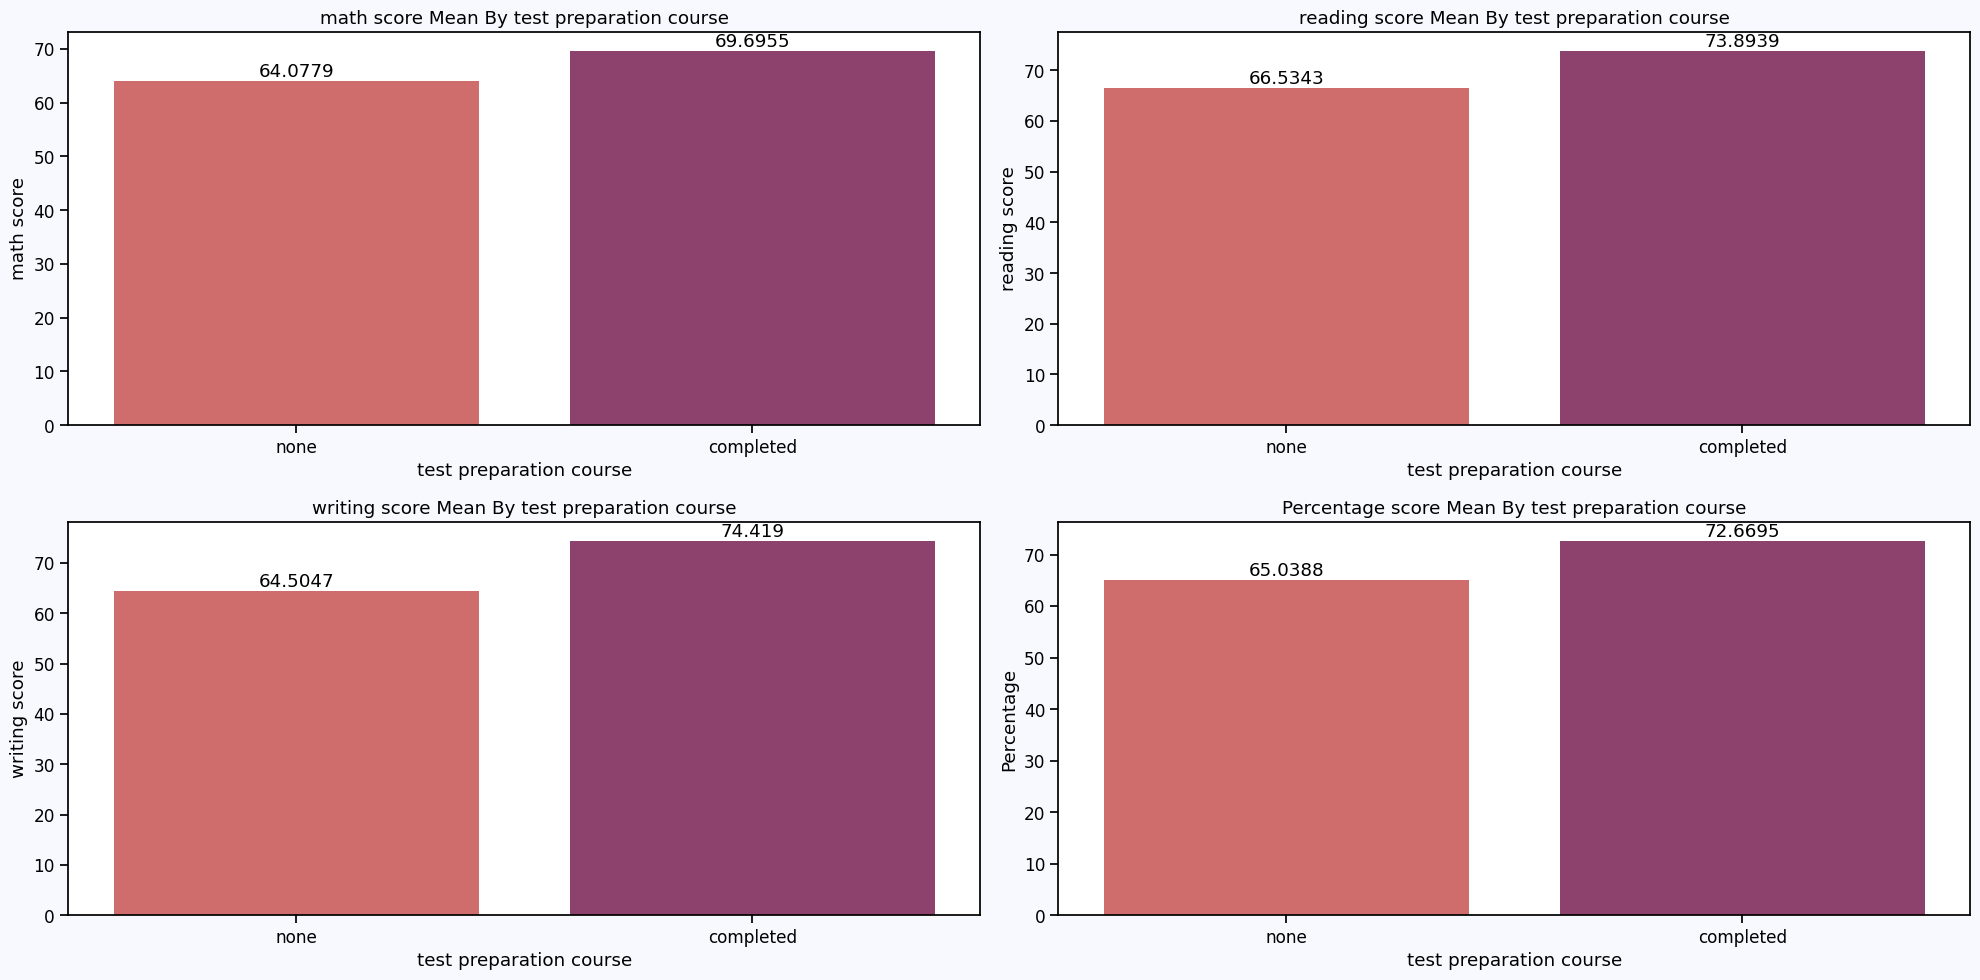

In [70]:
fig, axs = plt.subplots(2,2,figsize = (20,10))

g = sns.barplot(x = 'test preparation course',y = 'math score',data = df  ,ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][0])
g.bar_label(g.containers[0])
axs[0][0].set_title('math score Mean By test preparation course')

g = sns.barplot(x = 'test preparation course',y = 'reading score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][1])
g.bar_label(g.containers[0])
axs[0][1].set_title('reading score Mean By test preparation course')

g = sns.barplot(x = 'test preparation course',y = 'writing score',data = df  ,ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][0])
g.bar_label(g.containers[0])
axs[1][0].set_title('writing score Mean By test preparation course')

g = sns.barplot(x = 'test preparation course',y = 'Percentage',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][1])
g.bar_label(g.containers[0])
axs[1][1].set_title('Percentage score Mean By test preparation course')
plt.tight_layout()
plt.show()

#  Score distribution in exams by test preparation course

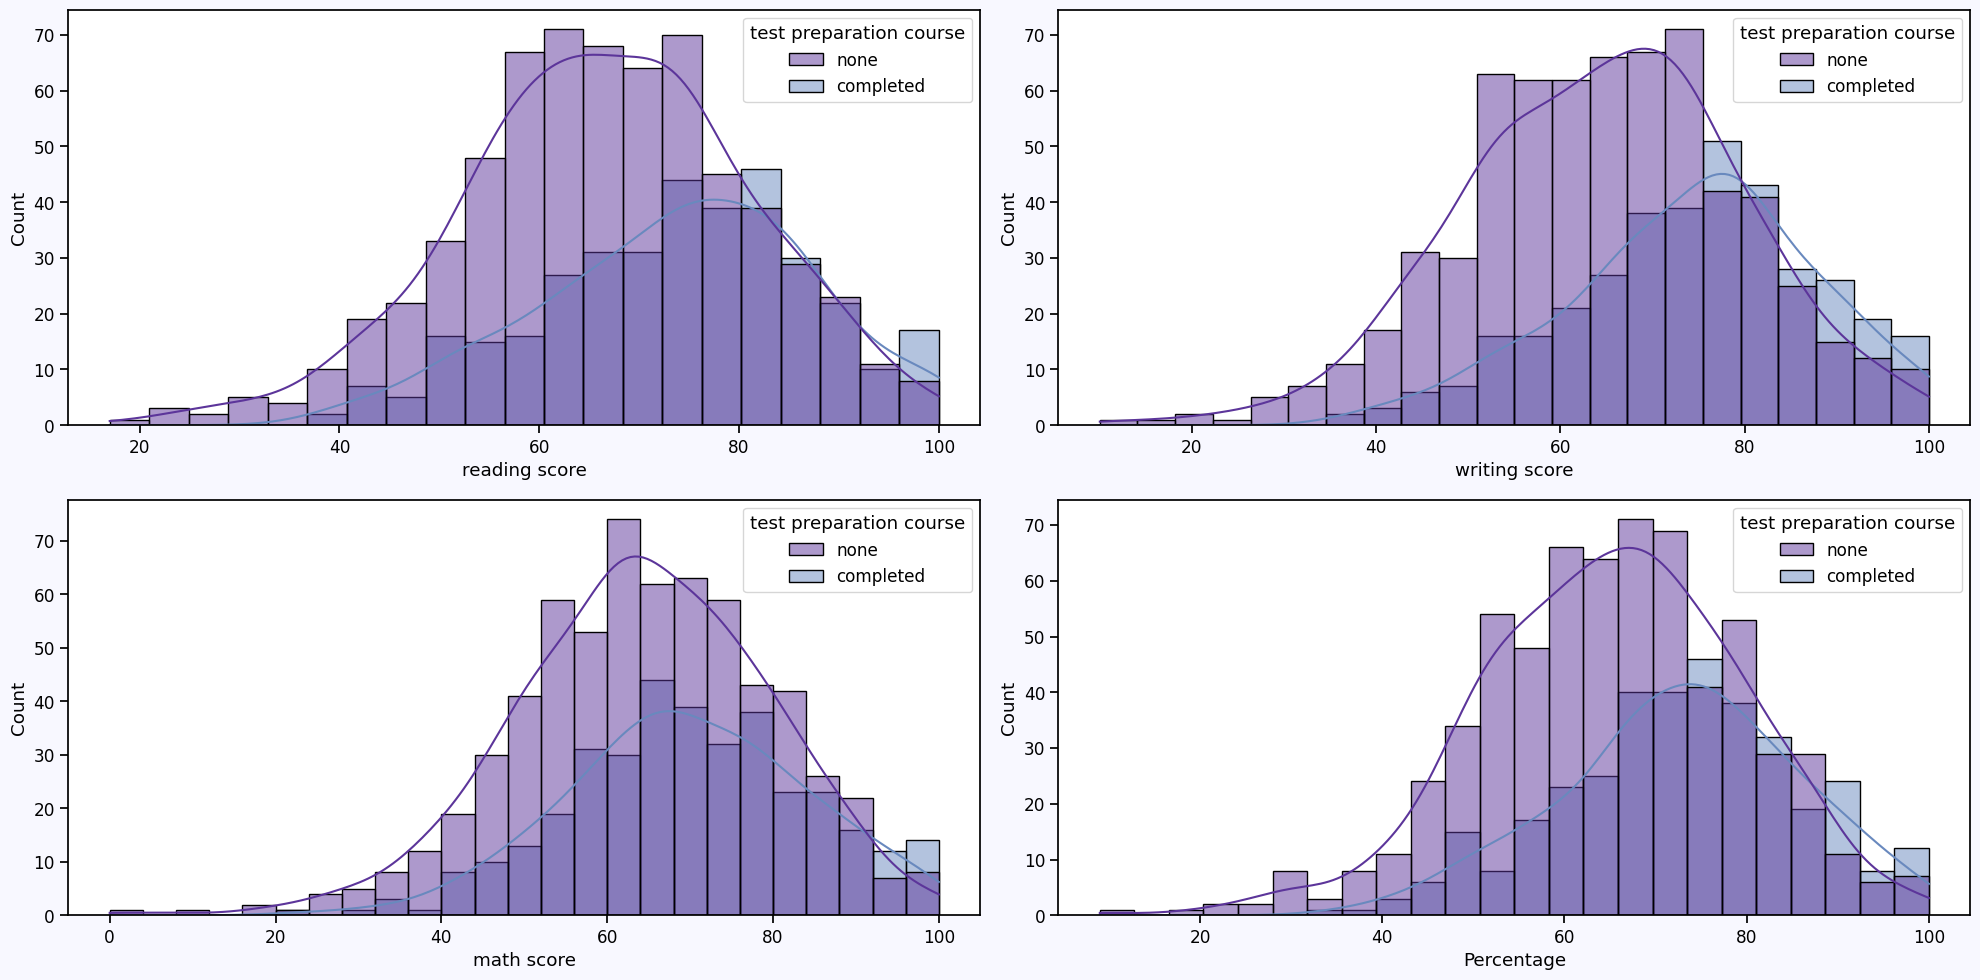

In [71]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))#dpi = 120

sns.histplot(x = 'reading score' ,data =df ,ax = axs[0][0] ,hue ='test preparation course' ,kde = True)
sns.histplot(x = 'writing score' ,data =df ,ax = axs[0][1],hue ='test preparation course',kde = True)
sns.histplot(x = 'math score' ,data =df ,ax = axs[1][0],hue ='test preparation course',kde = True)
sns.histplot(x = 'Percentage' ,data =df ,ax = axs[1][1],hue ='test preparation course',kde = True)

plt.tight_layout()
plt.show()

# did the student who toke standard lunch  did better in the exams ?

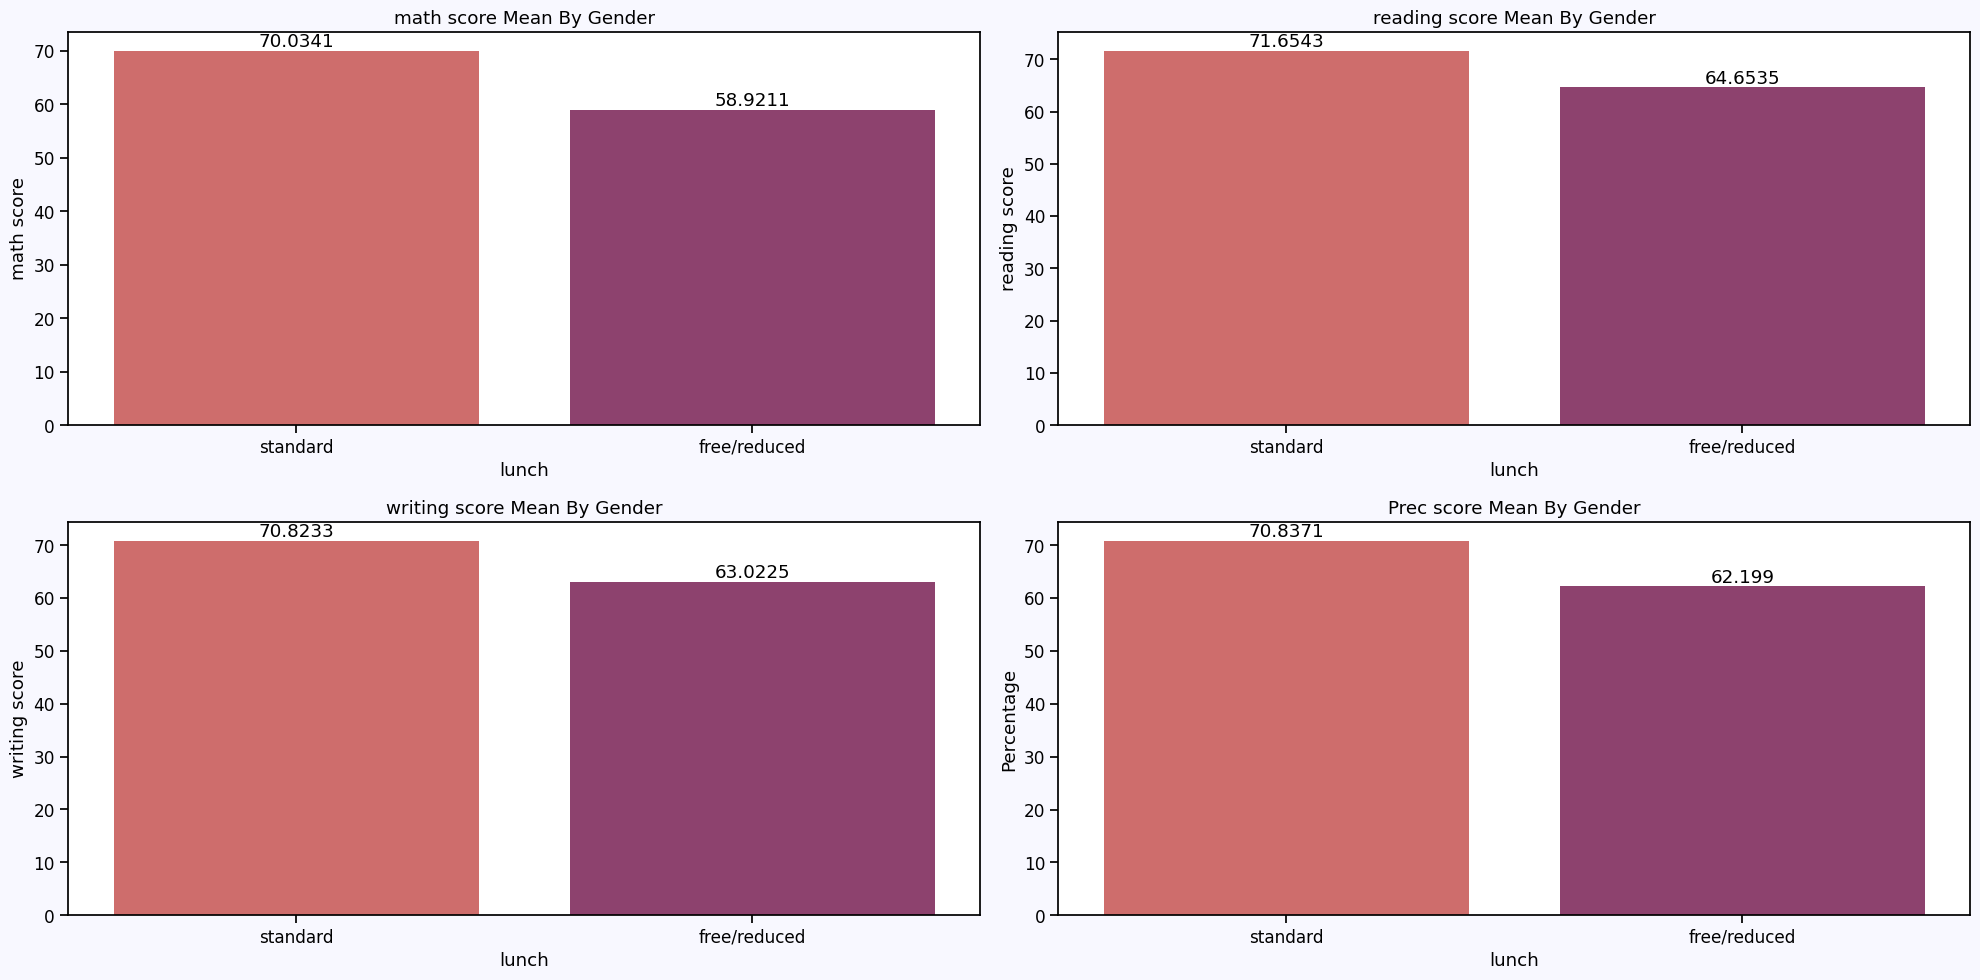

In [72]:
fig, axs = plt.subplots(2,2,figsize = (20,10))


g = sns.barplot(x = 'lunch',y = 'math score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][0])
g.bar_label(g.containers[0])
axs[0][0].set_title('math score Mean By Gender')

g = sns.barplot(x = 'lunch',y = 'reading score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[0][1])
g.bar_label(g.containers[0])
axs[0][1].set_title('reading score Mean By Gender')

g = sns.barplot(x = 'lunch',y = 'writing score',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][0])
g.bar_label(g.containers[0])
axs[1][0].set_title('writing score Mean By Gender')

g = sns.barplot(x = 'lunch',y = 'Percentage',data = df  , ci=None ,estimator=np.mean , palette= 'flare' ,ax = axs[1][1])
g.bar_label(g.containers[0])
axs[1][1].set_title('Prec score Mean By Gender')
plt.tight_layout()
plt.show()

#  Score distribution in exams by lunch

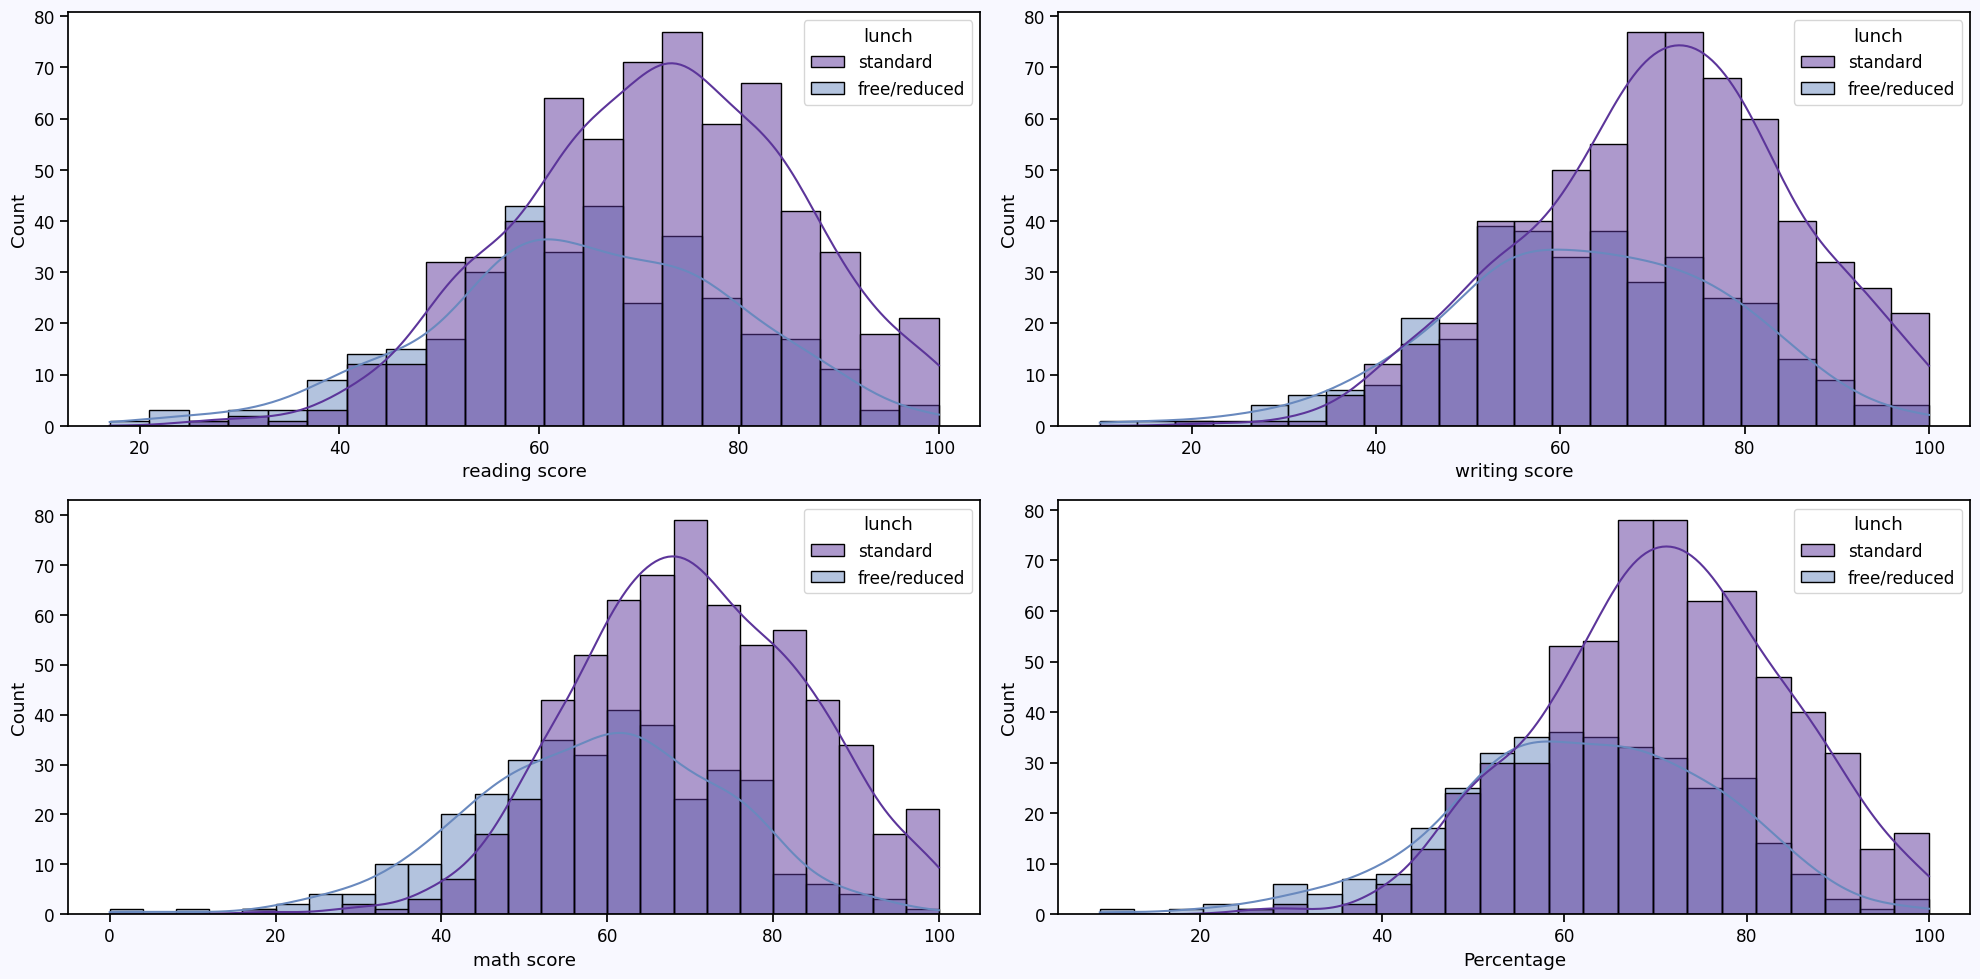

In [73]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))#dpi = 120

sns.histplot(x = 'reading score' ,data =df ,ax = axs[0][0] ,hue ='lunch' ,kde = True)
sns.histplot(x = 'writing score' ,data =df ,ax = axs[0][1],hue ='lunch',kde = True)
sns.histplot(x = 'math score' ,data =df ,ax = axs[1][0],hue ='lunch',kde = True)
sns.histplot(x = 'Percentage' ,data =df ,ax = axs[1][1],hue ='lunch',kde = True)

plt.tight_layout()
plt.show()

# heatmap 

<AxesSubplot:>

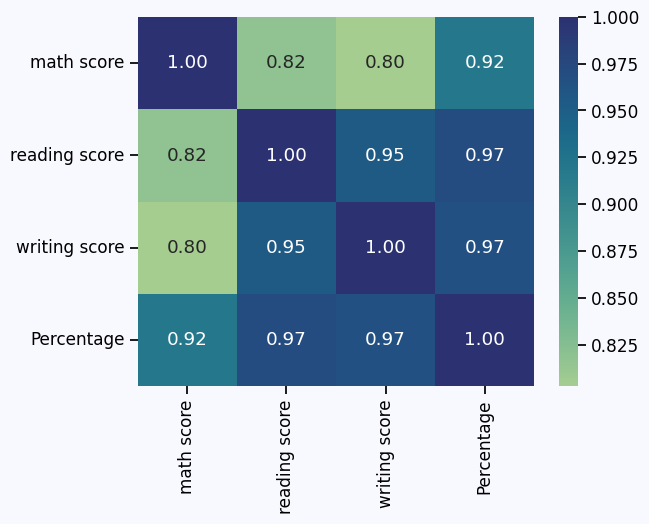

In [74]:
sns.heatmap(df.corr(), cmap = "crest" ,fmt = '.2f' ,annot=True)

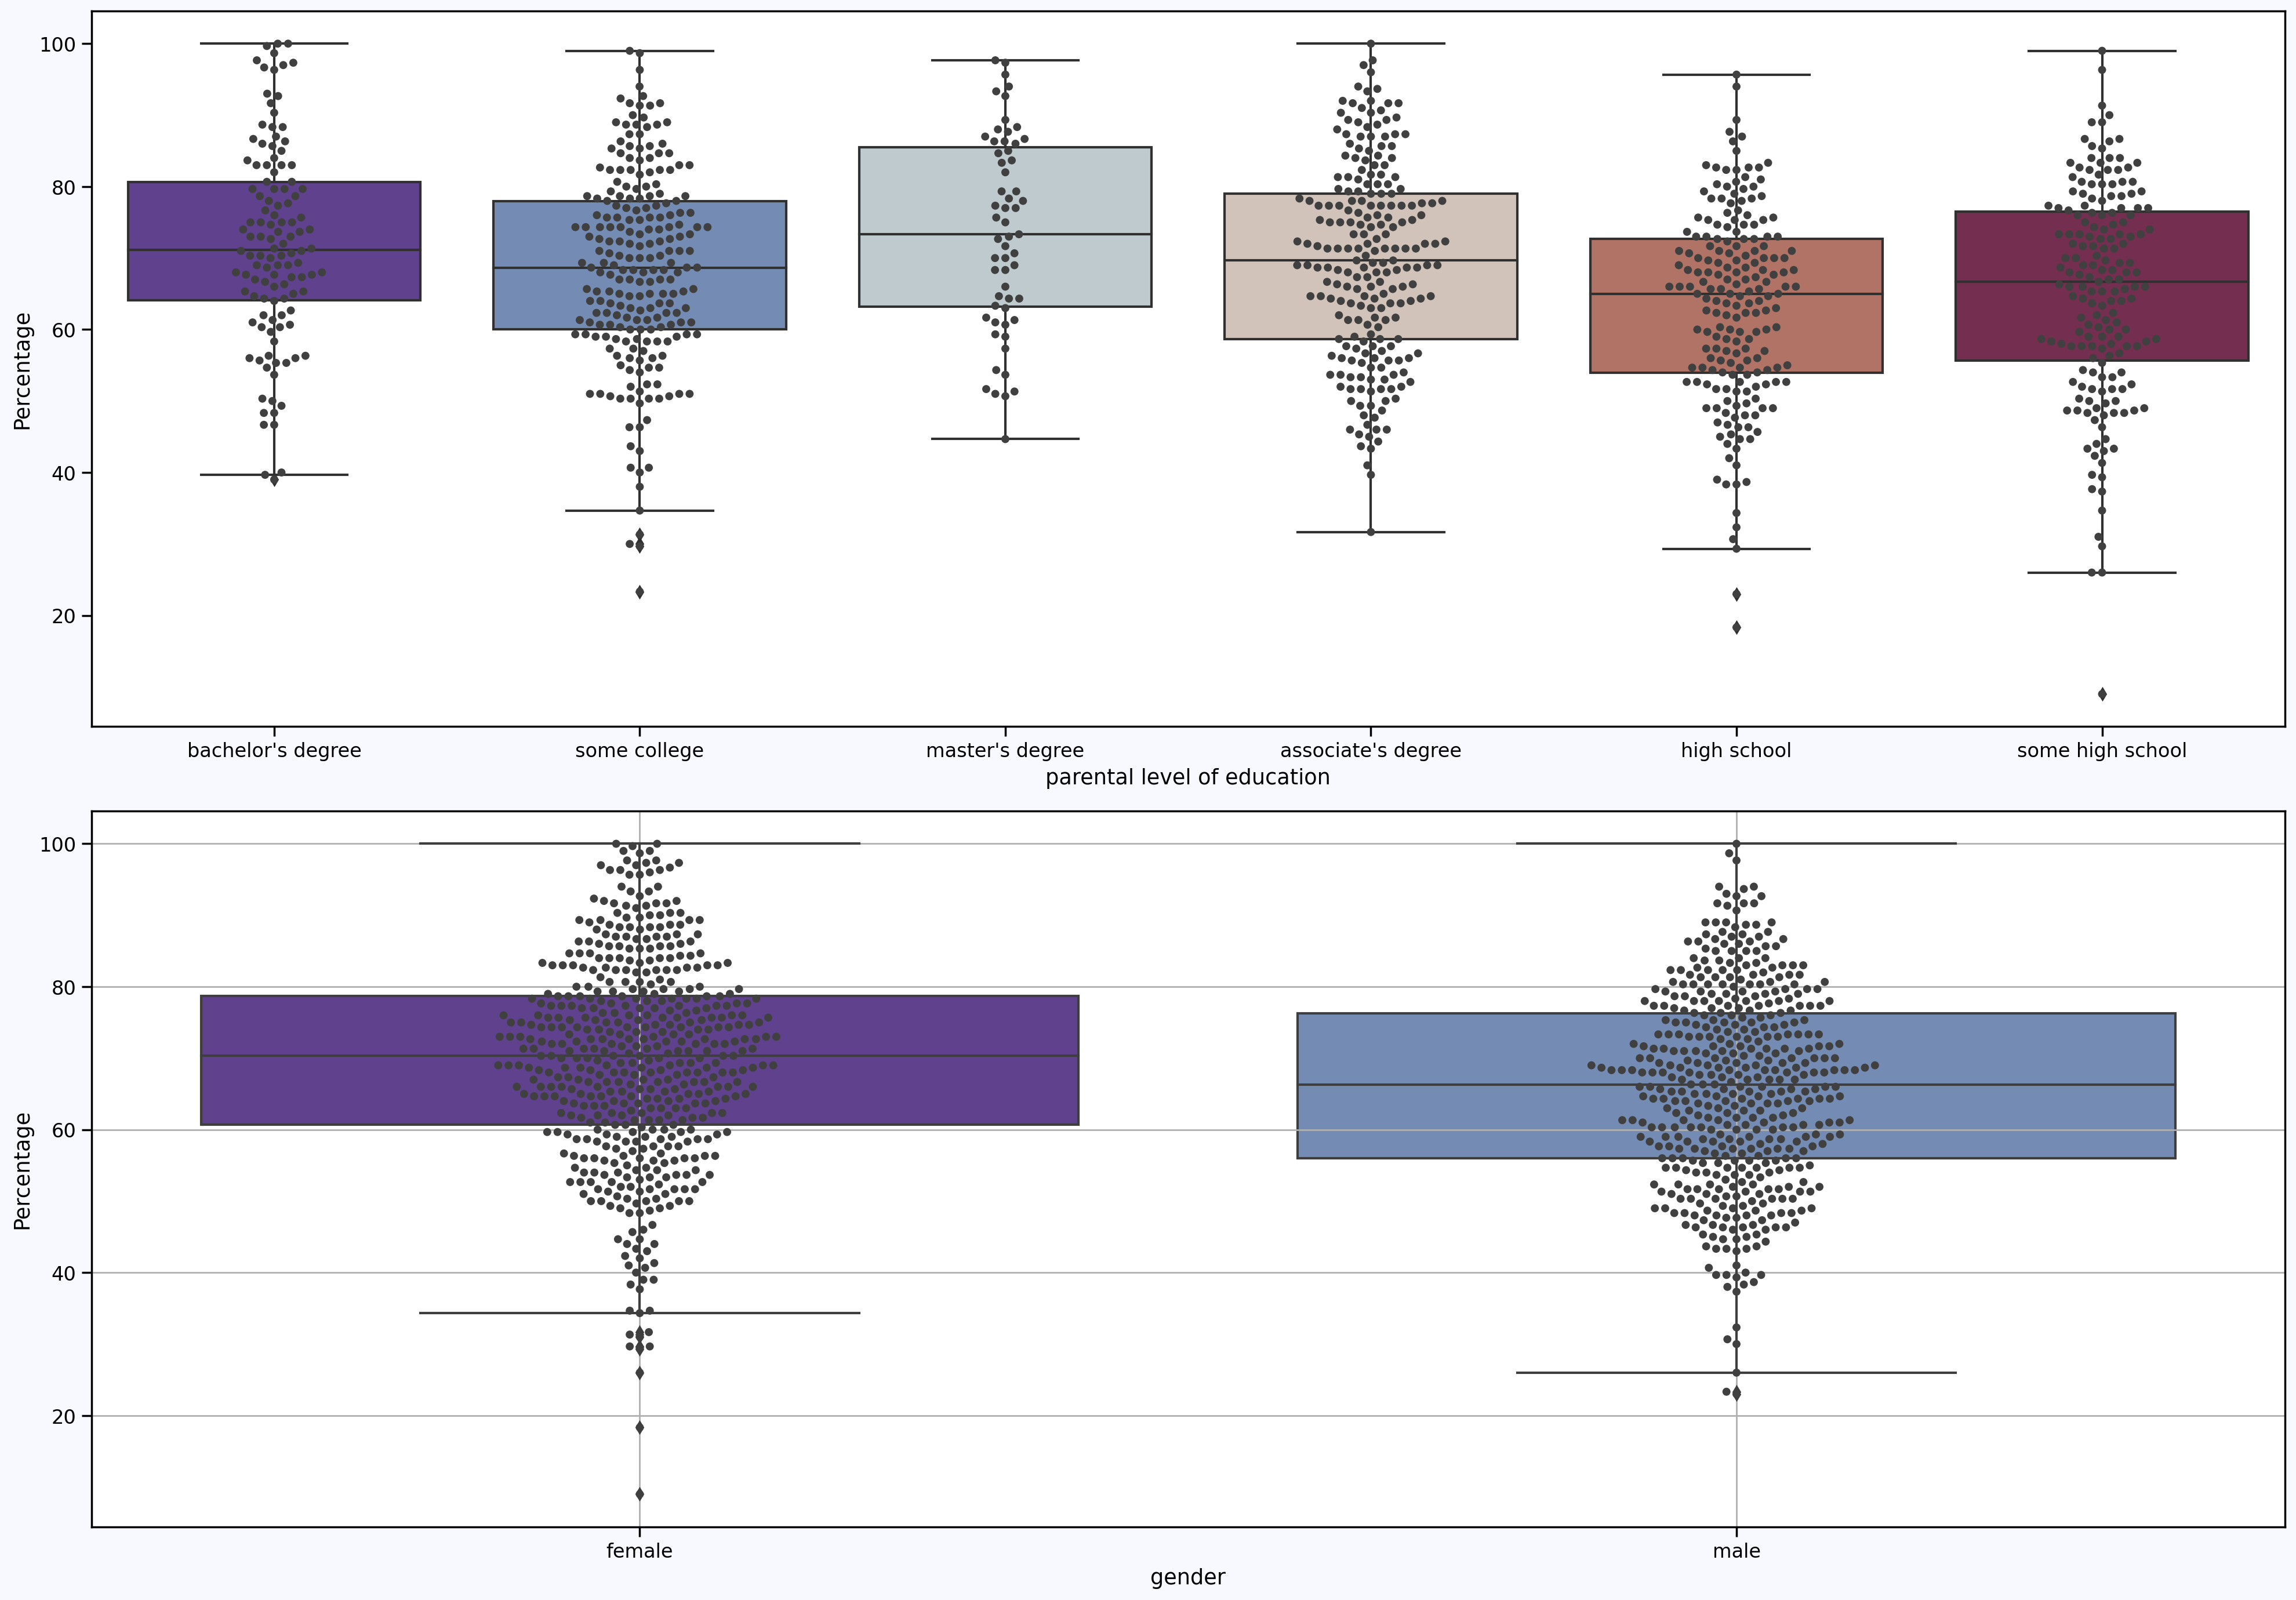

In [75]:
fig, axs = plt.subplots(2, 1, figsize = (20, 14),dpi = 200)#dpi = 120

sns.boxplot(data = df , y = 'Percentage',x = 'parental level of education' , ax = axs[0])
sns.swarmplot(data = df , y = 'Percentage',x = 'parental level of education' , ax = axs[0],color=".25")


sns.boxplot(data = df , x = 'gender',y = 'Percentage' , ax = axs[1])
sns.swarmplot(data = df , x = 'gender',y = 'Percentage' , ax = axs[1],color=".25")

plt.grid()
plt.tight_layout()
plt.show()

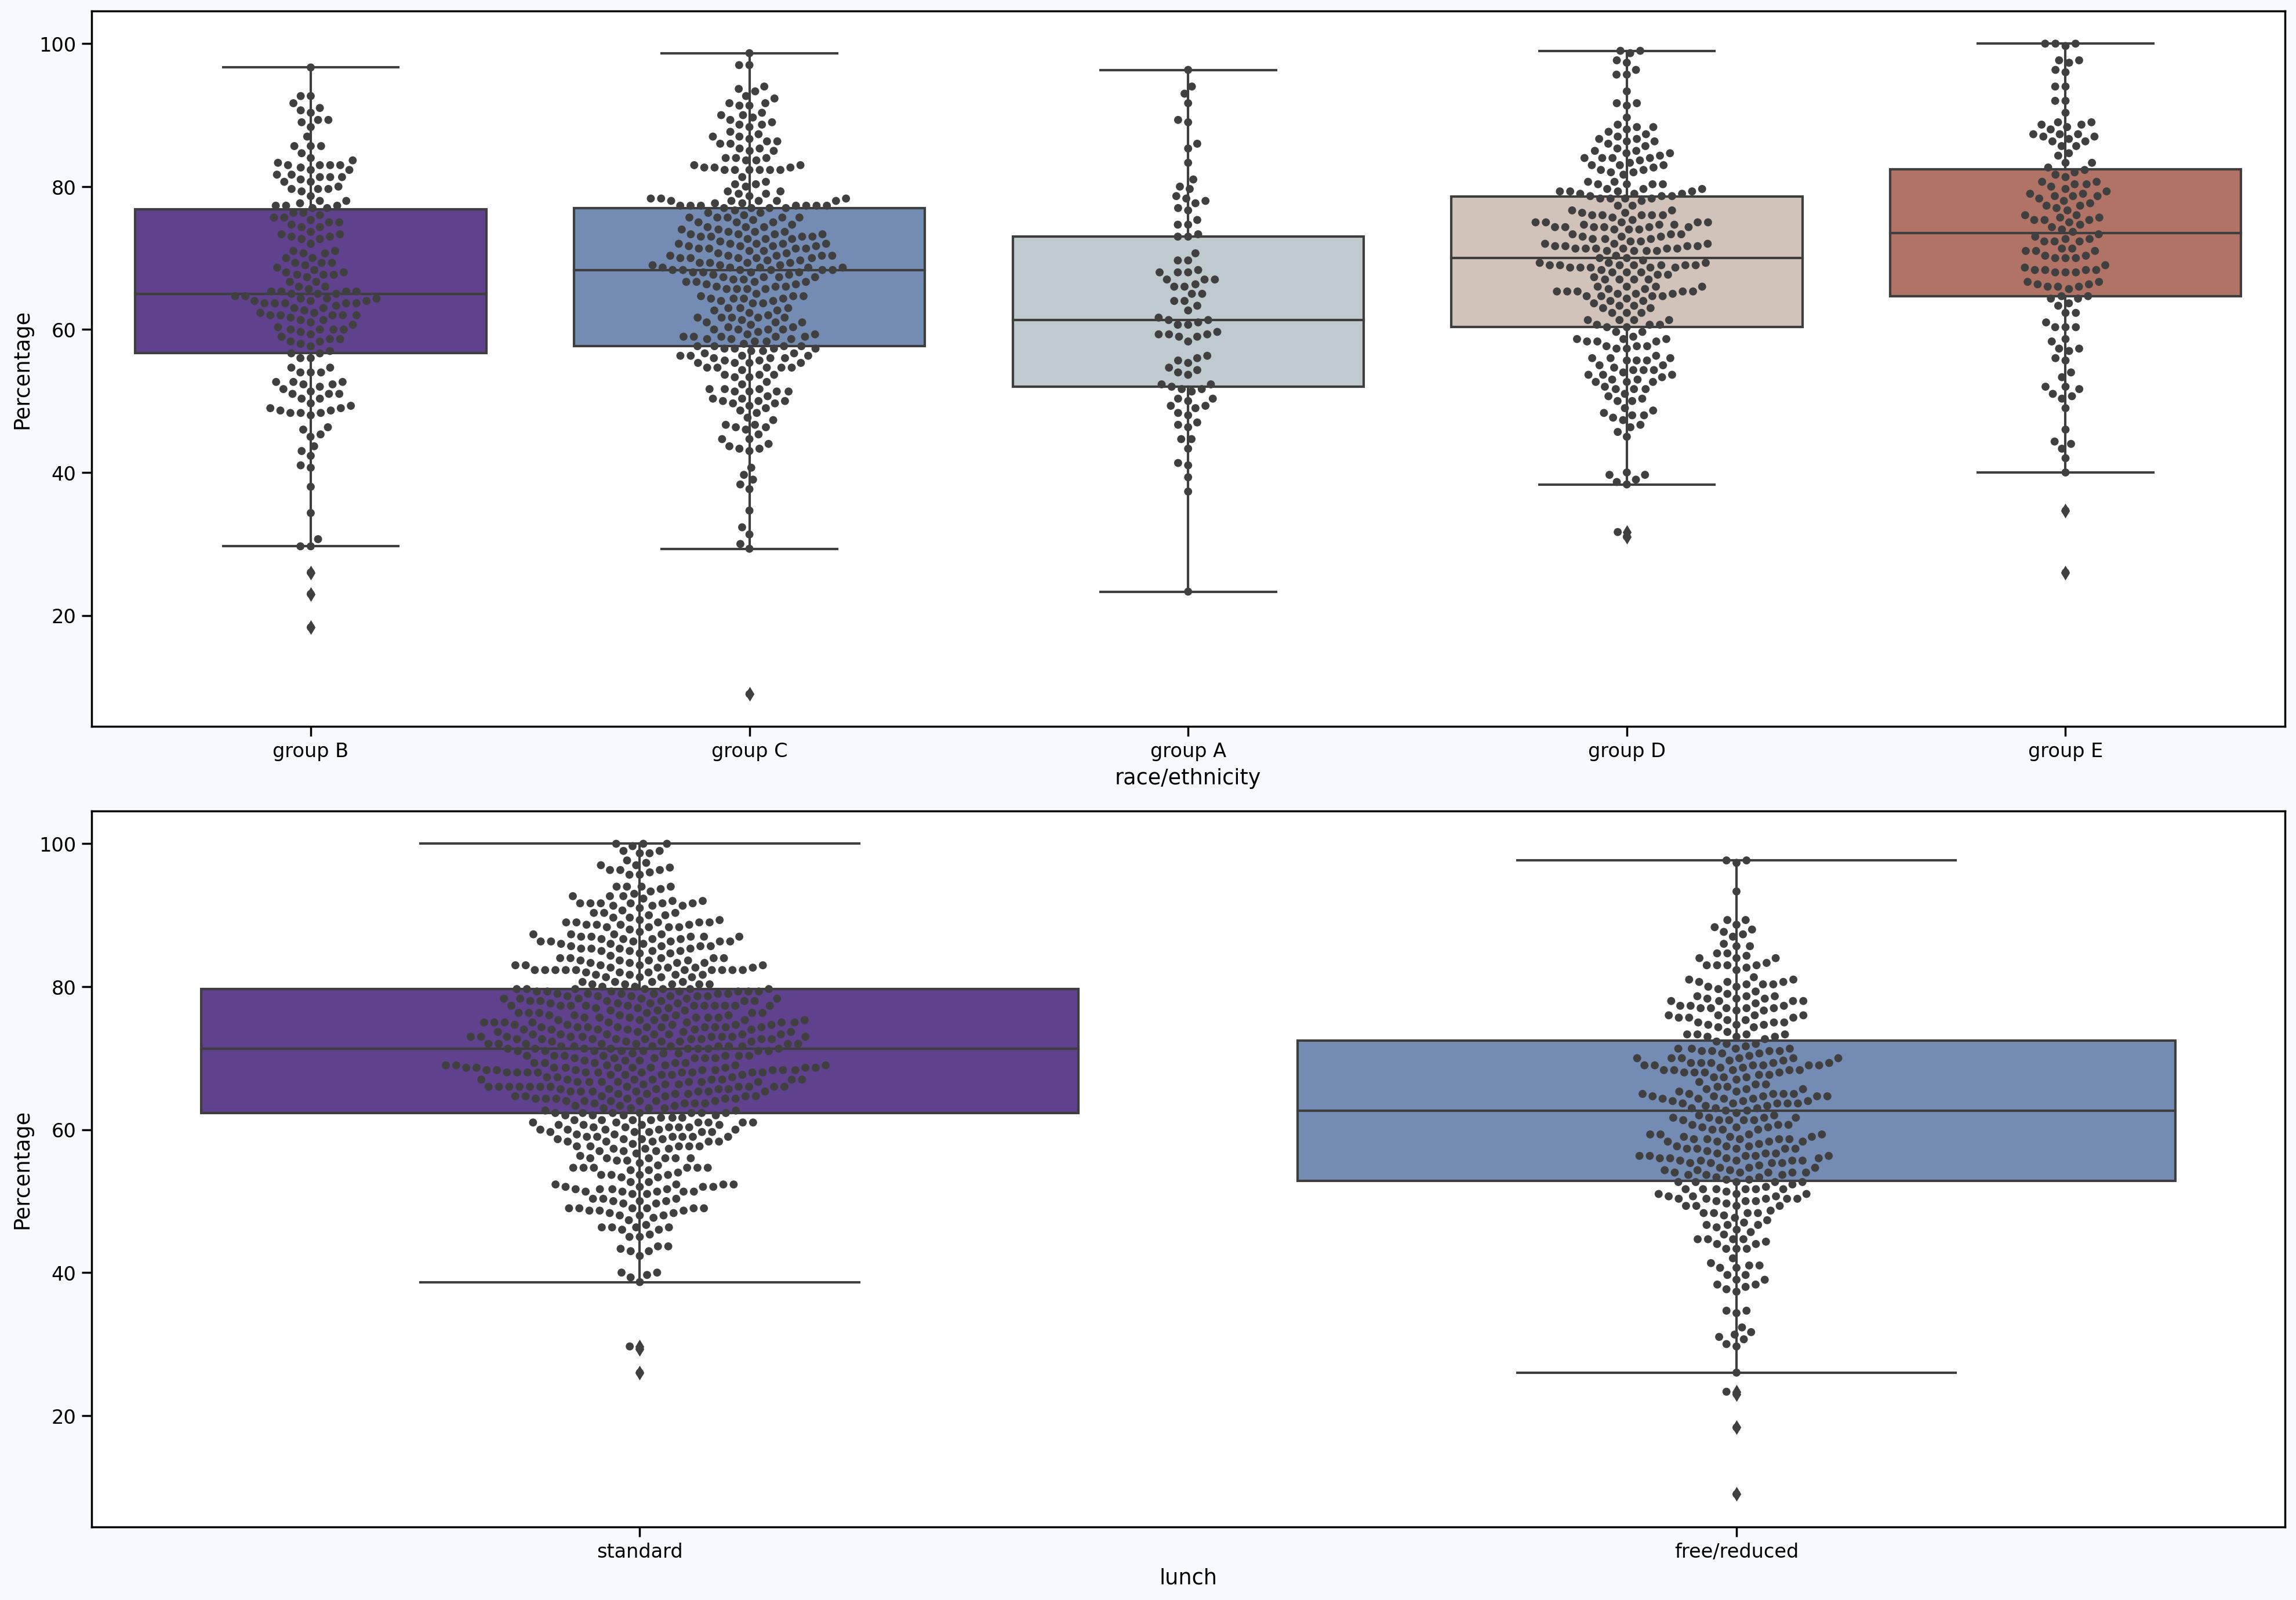

In [76]:
fig, axs = plt.subplots(2, 1, figsize = (20, 14),dpi = 200)#dpi = 120

sns.boxplot(data = df , x = 'race/ethnicity',y = 'Percentage' , ax = axs[0])
sns.swarmplot(data = df , x = 'race/ethnicity',y = 'Percentage' , ax = axs[0],color=".25")

sns.boxplot(data = df , x = 'lunch',y = 'Percentage' , ax = axs[1])
sns.swarmplot(data = df , x = 'lunch',y = 'Percentage' , ax = axs[1],color=".25")



plt.tight_layout()
plt.show()